In [2]:
!pip install pandas
!pip install imbalanced-learn
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#to import the data Covid_Vaccine_Nigeria_2024.CSV
data = pd.read_csv('Covid_Vaccine_Nigeria-2024_2.csv')
data['Age'] = data['Age'].replace('35-34', '25-34')



In [4]:
#look at the natre of the outcome(pridicted)
prevalence = data['Outcome_CovidVX'].value_counts()
print(prevalence)
prevalence_percent = data['Outcome_CovidVX'].value_counts(normalize=True) * 100
print(prevalence_percent)

Outcome_CovidVX
no     26698
yes     9463
Name: count, dtype: int64
Outcome_CovidVX
no     73.830923
yes    26.169077
Name: proportion, dtype: float64


In [5]:
#recode the outcome
data['Outcome_CovidVX'] = data['Outcome_CovidVX'].map({'yes': 1, 'no': 0})

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36161 entries, 0 to 36160
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   v001                        36161 non-null  int64 
 1   v002                        36161 non-null  int64 
 2   v003                        36161 non-null  int64 
 3   v004                        36161 non-null  int64 
 4   v005                        36161 non-null  int64 
 5   v006                        36161 non-null  int64 
 6   v007                        36161 non-null  int64 
 7   wgt                         36161 non-null  int64 
 8   Covid_info                  36161 non-null  object
 9   Covid_fever                 36161 non-null  object
 10  Covid_cough                 36161 non-null  object
 11  Covid_SOB                   36161 non-null  object
 12  Covid_MSpain                36161 non-null  object
 13  Covid_headache              36161 non-null  ob

In [40]:
y = data['Outcome_CovidVX']
X_raw= data[['Age', 'Education', 'Marital_status', 'Region','Occupation','Residence', 'Wealthindex','Distance_to_healthfacility','Money','Permission','Helath_insurance','Contraception','Visit_HealthFacility','Television','Radio','Newspaper']]             
X = pd.get_dummies(X_raw, drop_first=True).astype(int)

                 Feature         Chi2        p-value
3                 Region  1395.067992  1.612427e-299
1              Education   825.711427  1.147945e-178
4             Occupation   663.717505  2.322050e-146
11                 Radio   527.292441  3.161558e-115
6            Wealthindex   472.955336  4.727988e-101
0                    Age   453.152830   3.972951e-99
9   Visit_HealthFacility   331.601624   4.304810e-74
8          Contraception   318.719386   2.753268e-71
10            Television   281.605851   7.080540e-62
7       Helath_insurance   252.670993   6.794403e-57
5              Residence   200.691470   1.475499e-45
2         Marital_status   131.507688   2.776312e-29
12             Newspaper   100.124295   1.812532e-22


C:\Users\AUT\AppData\Local\Temp\ipykernel_20544\1139955858.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=chi2_df, x='Chi2', y='Feature', palette='viridis')


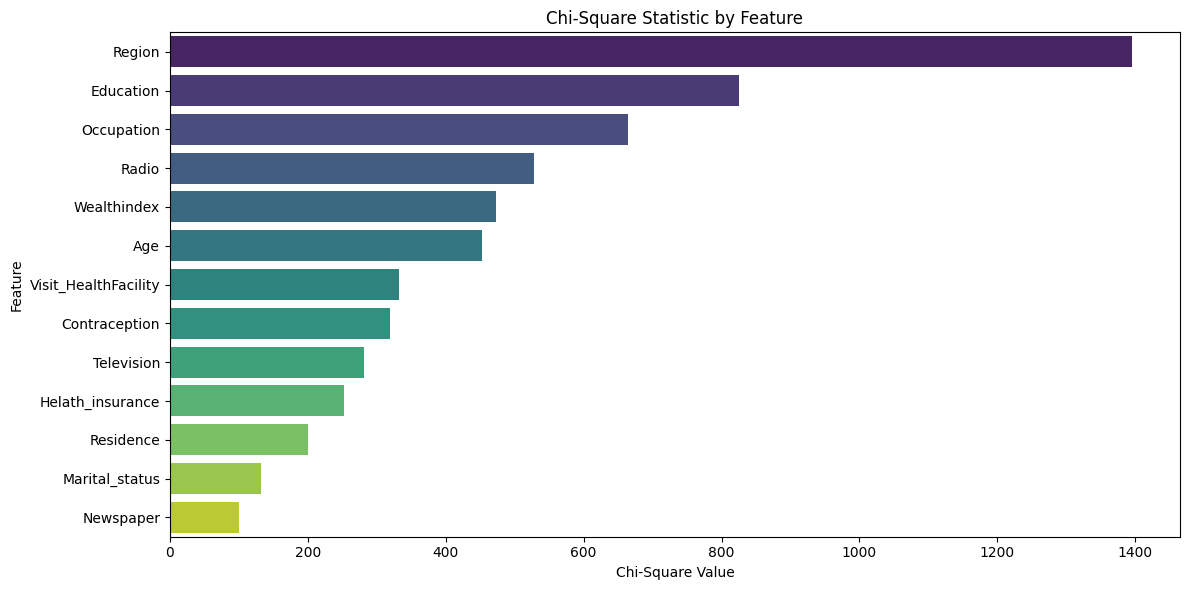

In [19]:
#run chisquare to identify more appropriate features (before dummying)
from scipy.stats import chi2_contingency
# Initialize list to store results
chi2_results = []
# Loop through each feature in X
for col in X_raw.columns:
    contingency_table = pd.crosstab(X_raw[col], y)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results.append({'Feature': col, 'Chi2': chi2, 'p-value': p})
# Convert to DataFrame and sort by Chi2 statistic
chi2_df = pd.DataFrame(chi2_results).sort_values(by='Chi2', ascending=False)
print(chi2_df)
#Visualize Chi-Square Statistics with a Bar Plot (features before dummying)
import matplotlib.pyplot as plt
import seaborn as sns
# Sort by Chi2 value (already done in chi2_df)
plt.figure(figsize=(12, 6))
sns.barplot(data=chi2_df, x='Chi2', y='Feature', palette='viridis')
plt.title('Chi-Square Statistic by Feature')
plt.xlabel('Chi-Square Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

                            Feature         Chi2        p-value
9                  Region_sout west  1068.844104  1.952223e-234
12               Occupation_working   663.717505  2.322050e-146
2            Education_no education   553.142607  2.608248e-122
24                 Radio_not at all   446.550748   4.062324e-99
23       Radio_at least once a week   396.931242   2.564314e-88
8                 Region_north west   348.104882   1.096053e-77
15              Wealthindex_poorest   336.116062   4.474426e-75
20         Visit_HealthFacility_yes   331.601624   4.304810e-74
19              Contraception_users   318.719386   2.753268e-71
1                         Age_35-49   314.377282   2.430438e-70
22            Television_not at all   280.041859   7.353166e-63
18             Helath_insurance_yes   252.670993   6.794403e-57
13                  Residence_urban   200.691470   1.475499e-45
10                Region_south east   161.778916   4.623701e-37
21  Television_at least once a week   15

C:\Users\AUT\AppData\Local\Temp\ipykernel_20544\2946374751.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=chi2_df, x='Chi2', y='Feature', palette='viridis')


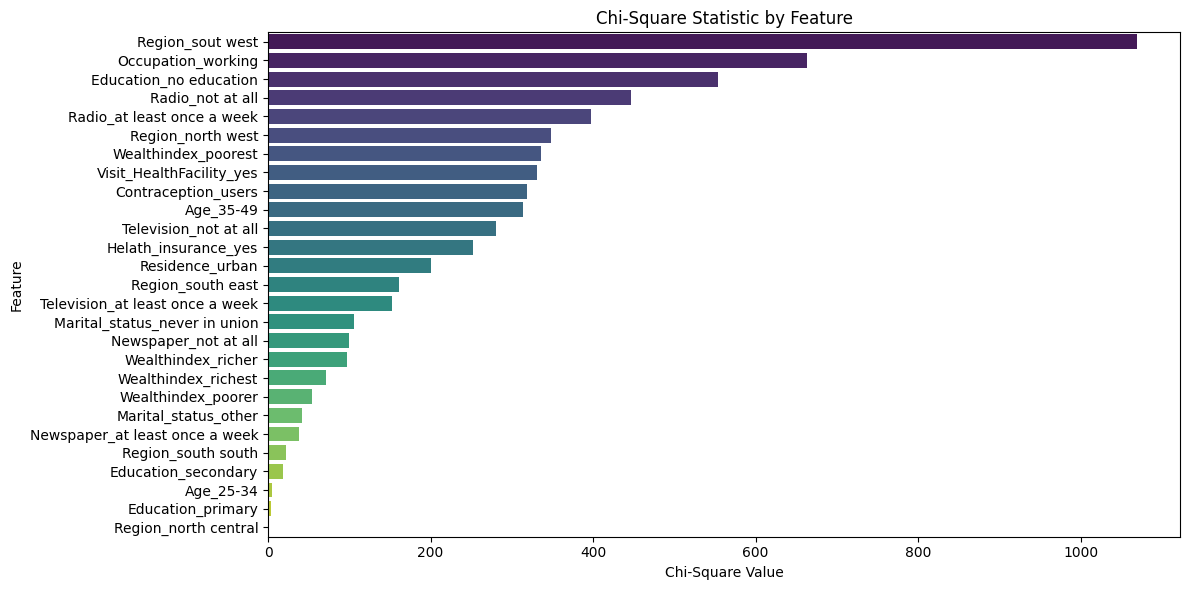

In [20]:
#run chisquare to identify more appropriate features (after dummying)
from scipy.stats import chi2_contingency
# Initialize list to store results
chi2_results = []
# Loop through each feature in X
for col in X.columns:
    contingency_table = pd.crosstab(X[col], y)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results.append({'Feature': col, 'Chi2': chi2, 'p-value': p})
# Convert to DataFrame and sort by Chi2 statistic
chi2_df = pd.DataFrame(chi2_results).sort_values(by='Chi2', ascending=False)
print(chi2_df)
#Visualize Chi-Square Statistics with a Bar Plot (features after dummying)
import matplotlib.pyplot as plt
import seaborn as sns
# Sort by Chi2 value (already done in chi2_df)
plt.figure(figsize=(12, 6))
sns.barplot(data=chi2_df, x='Chi2', y='Feature', palette='viridis')
plt.title('Chi-Square Statistic by Feature')
plt.xlabel('Chi-Square Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [41]:
##checking for multicolinearity between features
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import pandas as pd
# Drop missing values if any
X_clean = X.dropna()
# Add constant for intercept
X_const = sm.add_constant(X_clean)
# Calculate VIF
vif = pd.DataFrame({
    "Feature": X_const.columns,
    "VIF": [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
}).sort_values(by="VIF", ascending=True)
print("VIF Scores:\n", vif)

VIF Scores:
                                          Feature        VIF
7                           Marital_status_other   1.063527
22                          Helath_insurance_yes   1.102337
24                      Visit_HealthFacility_yes   1.123883
23                           Contraception_users   1.142207
21                  Permission_not a big problem   1.173518
13                            Occupation_working   1.223712
20                       Money_not a big problem   1.302850
19  Distance_to_healthfacility_not a big problem   1.316233
29                Newspaper_at least once a week   1.552044
14                               Residence_urban   1.614104
30                          Newspaper_not at all   1.679173
15                            Wealthindex_poorer   1.715032
27                    Radio_at least once a week   1.736423
1                                      Age_25-34   1.864656
17                            Wealthindex_richer   1.914862
6                  Marital_

In [42]:
prevalence = data['Outcome_CovidVX'].value_counts()
print(prevalence)
prevalence_percent = data['Outcome_CovidVX'].value_counts(normalize=True) * 100
print(prevalence_percent)

Outcome_CovidVX
0    26698
1     9463
Name: count, dtype: int64
Outcome_CovidVX
0    73.830923
1    26.169077
Name: proportion, dtype: float64


In [11]:
#Check for Missing Values
print("Missing Values:\n", X.isnull().sum().sort_values(ascending=False))

Missing Values:
 Age_25-34                                       0
Age_35-49                                       0
Education_no education                          0
Education_primary                               0
Education_secondary                             0
Marital_status_never in union                   0
Marital_status_other                            0
Region_north central                            0
Region_north west                               0
Region_sout west                                0
Region_south east                               0
Region_south south                              0
Occupation_working                              0
Residence_urban                                 0
Wealthindex_poorer                              0
Wealthindex_poorest                             0
Wealthindex_richer                              0
Wealthindex_richest                             0
Distance_to_healthfacility_not a big problem    0
Money_not a big problem          

In [51]:
###Train the data based on the before balancing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [44]:
# Count the number of vaccinated (1) and not vaccinated (0) before balancing(resampling)
vaccination_counts = y.value_counts()
print(vaccination_counts)


Outcome_CovidVX
0    26698
1     9463
Name: count, dtype: int64


In [52]:
#To enhance model performance we should implement handlig of data imbalance
#Resampling Techniques
#1 SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [53]:
###Train the data based on the resampled 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [54]:
# Count the number of vaccinated (1) and not vaccinated (0)
vaccination_counts = y_resampled.value_counts()
# Display the result
print("Vaccination status distribution:")
print(vaccination_counts)

Vaccination status distribution:
Outcome_CovidVX
0    26698
1    26698
Name: count, dtype: int64


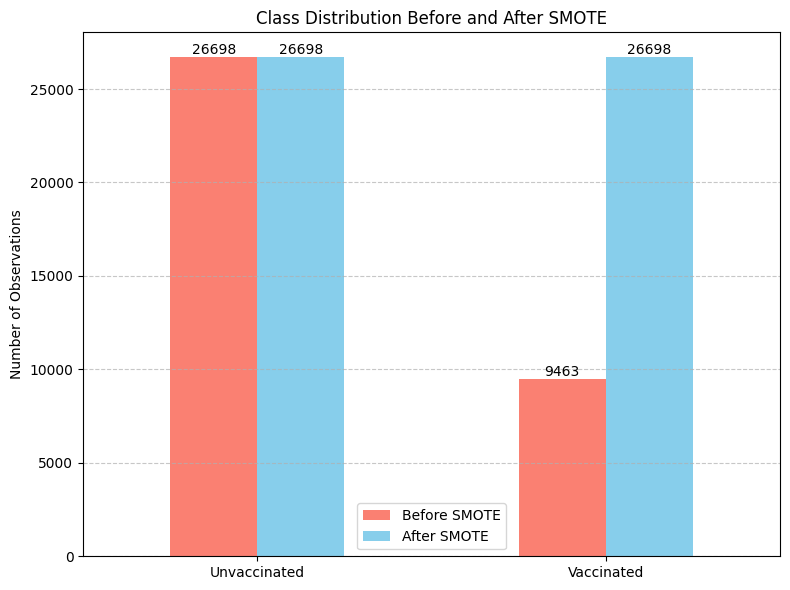

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
# Original and balanced class counts
original_counts = pd.Series({'Unvaccinated': 26698, 'Vaccinated': 9463})
balanced_counts = pd.Series({'Unvaccinated': 26698, 'Vaccinated': 26698})
# Combine into a DataFrame
df_plot = pd.DataFrame({
    'Before SMOTE': original_counts,
    'After SMOTE': balanced_counts
})
# Plot
ax = df_plot.plot(kind='bar', figsize=(8, 6), color=['salmon', 'skyblue'])
plt.title('Class Distribution Before and After SMOTE')
plt.ylabel('Number of Observations')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)
plt.tight_layout()
plt.show()

In [18]:
#FIT all Algorithms

In [55]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score
)
import numpy as np

# 1. Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# 2. Make predictions
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]  # Probabilities for positive class

# 3. Confusion matrix and core metrics
cm = confusion_matrix(y_test, y_pred_lr)
tn, fp, fn, tp = cm.ravel()

# Core metrics
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, zero_division=0)
sensitivity = recall_score(y_test, y_pred_lr, zero_division=0)  # Recall
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
npv = tn / (tn + fn) if (tn + fn) != 0 else 0
fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
fnr = fn / (fn + tp) if (fn + tp) != 0 else 0
f1 = f1_score(y_test, y_pred_lr, zero_division=0)
auc_score = roc_auc_score(y_test, y_prob_lr)

# 4. Display results
print("🔹 Accuracy:", round(accuracy, 3))
print("🔹 Precision (PPV):", round(precision, 3))
print("🔹 Sensitivity (Recall):", round(sensitivity, 3))
print("🔹 Specificity:", round(specificity, 3))
print("🔹 Negative Predictive Value (NPV):", round(npv, 3))
print("🔹 False Positive Rate (FPR):", round(fpr, 3))
print("🔹 False Negative Rate (FNR):", round(fnr, 3))
print("🔹 F1 Score:", round(f1, 3))
print("🔹 AUC:", round(auc_score, 3))
print("🔹 Confusion Matrix:\n", cm)
print("🔹 Classification Report:\n", classification_report(y_test, y_pred_lr))
print("🔹 True Positives (TP):", tp)
print("🔹 True Negatives (TN):", tn)
print("🔹 False Positives (FP):", fp)
print("🔹 False Negatives (FN):", fn)

🔹 Accuracy: 0.66
🔹 Precision (PPV): 0.664
🔹 Sensitivity (Recall): 0.646
🔹 Specificity: 0.673
🔹 Negative Predictive Value (NPV): 0.656
🔹 False Positive Rate (FPR): 0.327
🔹 False Negative Rate (FNR): 0.354
🔹 F1 Score: 0.655
🔹 AUC: 0.719
🔹 Confusion Matrix:
 [[3595 1745]
 [1889 3451]]
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.67      0.66      5340
           1       0.66      0.65      0.66      5340

    accuracy                           0.66     10680
   macro avg       0.66      0.66      0.66     10680
weighted avg       0.66      0.66      0.66     10680

🔹 True Positives (TP): 3451
🔹 True Negatives (TN): 3595
🔹 False Positives (FP): 1745
🔹 False Negatives (FN): 1889


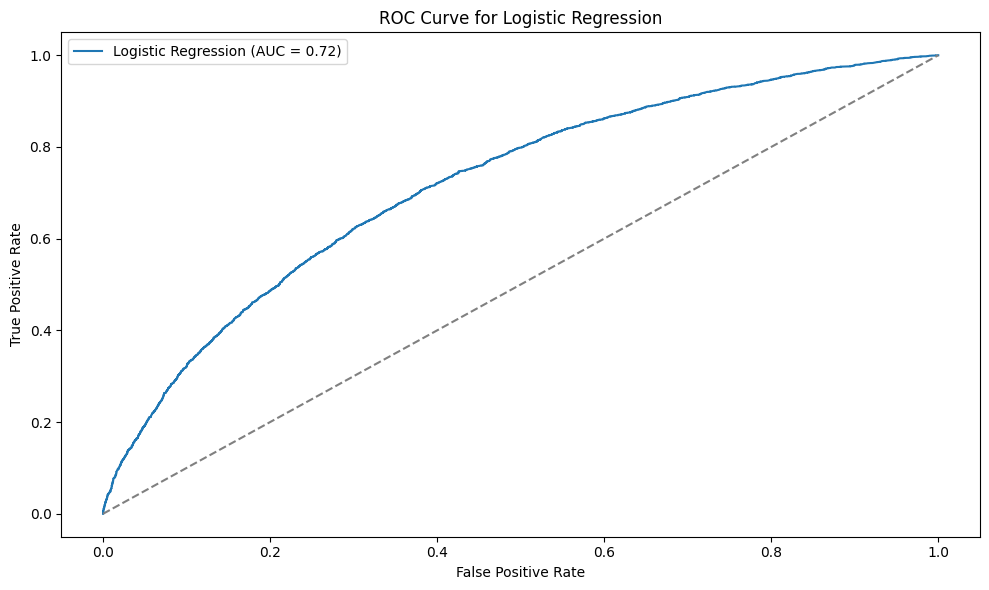

In [56]:
#Plot ROC curve
#AUC (Area Under Curve): Measures discrimination ability.
  # AUC > 0.7 is acceptable; > 0.8 is good.
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
auc = roc_auc_score(y_test, y_prob_lr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.tight_layout()
plt.show()

In [62]:
# Fit logistic regression using statsmodels to get standard errors
X_const = sm.add_constant(X)
model = sm.Logit(y, X)
result = model.fit()
# Extract coefficients and standard errors
params = result.params
conf = result.conf_int()
conf['OR_lower'] = np.exp(conf[0])
conf['OR_upper'] = np.exp(conf[1])
odds_ratios = pd.DataFrame({
    'Feature': params.index,
    'Odds Ratio': np.exp(params),
    'CI Lower': conf['OR_lower'],
    'CI Upper': conf['OR_upper']
}).sort_values(by='Odds Ratio', ascending=False)
print(odds_ratios)


Optimization terminated successfully.
         Current function value: 0.531307
         Iterations 6
                                                                                   Feature  \
Helath_insurance_yes                                                  Helath_insurance_yes   
Age_35-49                                                                        Age_35-49   
Occupation_working                                                      Occupation_working   
Radio_at least once a week                                      Radio_at least once a week   
Visit_HealthFacility_yes                                          Visit_HealthFacility_yes   
Age_25-34                                                                        Age_25-34   
Region_sout west                                                          Region_sout west   
Marital_status_other                                                  Marital_status_other   
Permission_not a big problem                        

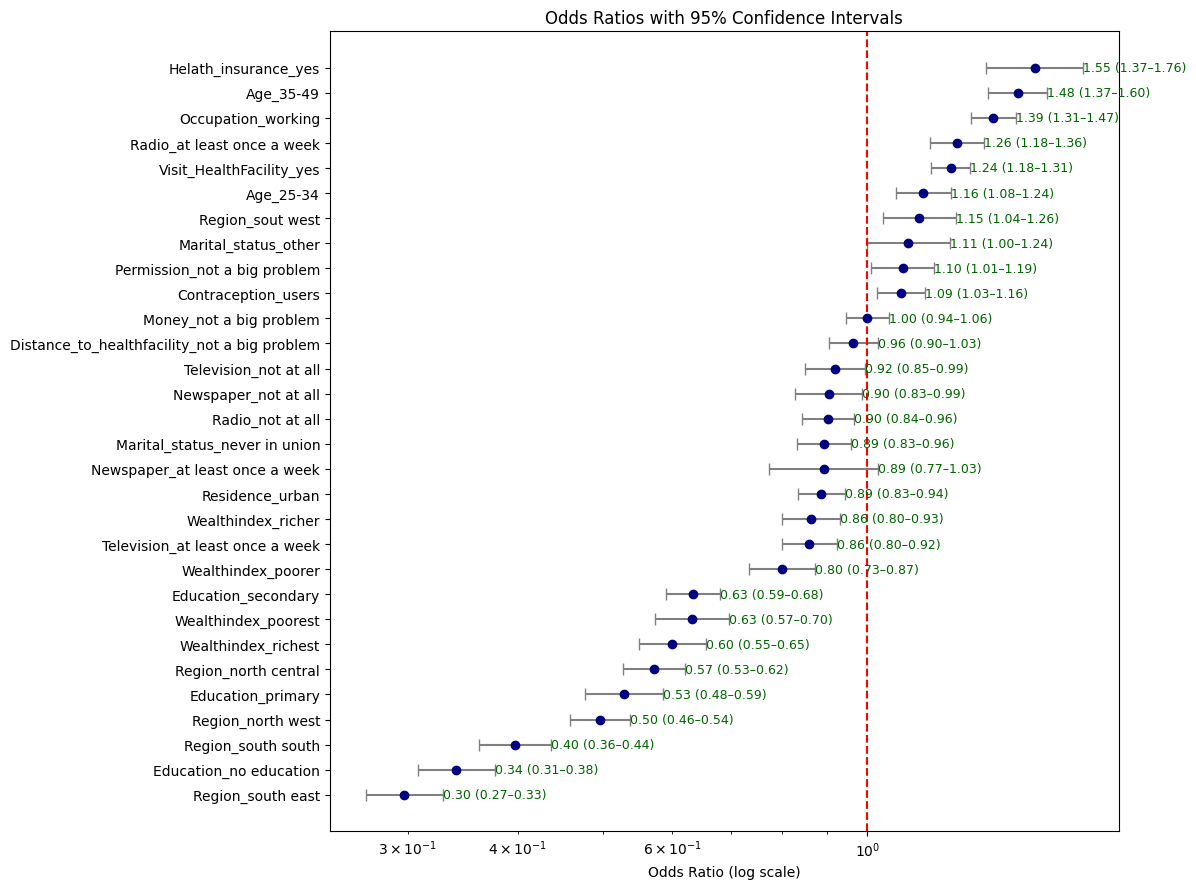

In [61]:
import matplotlib.pyplot as plt
# Sort for cleaner display
odds_ratios_sorted = odds_ratios.sort_values(by='Odds Ratio', ascending=True)
# Plot
plt.figure(figsize=(12, 9))
plt.errorbar(
    odds_ratios_sorted['Odds Ratio'],
    odds_ratios_sorted['Feature'],
    xerr=[odds_ratios_sorted['Odds Ratio'] - odds_ratios_sorted['CI Lower'],
          odds_ratios_sorted['CI Upper'] - odds_ratios_sorted['Odds Ratio']],
    fmt='o',
    color='navy',
    ecolor='gray',
    capsize=4
)
# Add OR (95% CI) labels
for i, row in odds_ratios_sorted.iterrows():
    or_val = row['Odds Ratio']
    ci_low = row['CI Lower']
    ci_up = row['CI Upper']
    label = f"{or_val:.2f} ({ci_low:.2f}–{ci_up:.2f})"
    plt.text(ci_up, i, label, va='center', ha='left', fontsize=9, color='darkgreen')

plt.axvline(x=1, color='red', linestyle='--')  # Reference line at OR=1
plt.xlabel('Odds Ratio (log scale)')
plt.title('Odds Ratios with 95% Confidence Intervals')
plt.xscale('log')
plt.tight_layout()
plt.show()


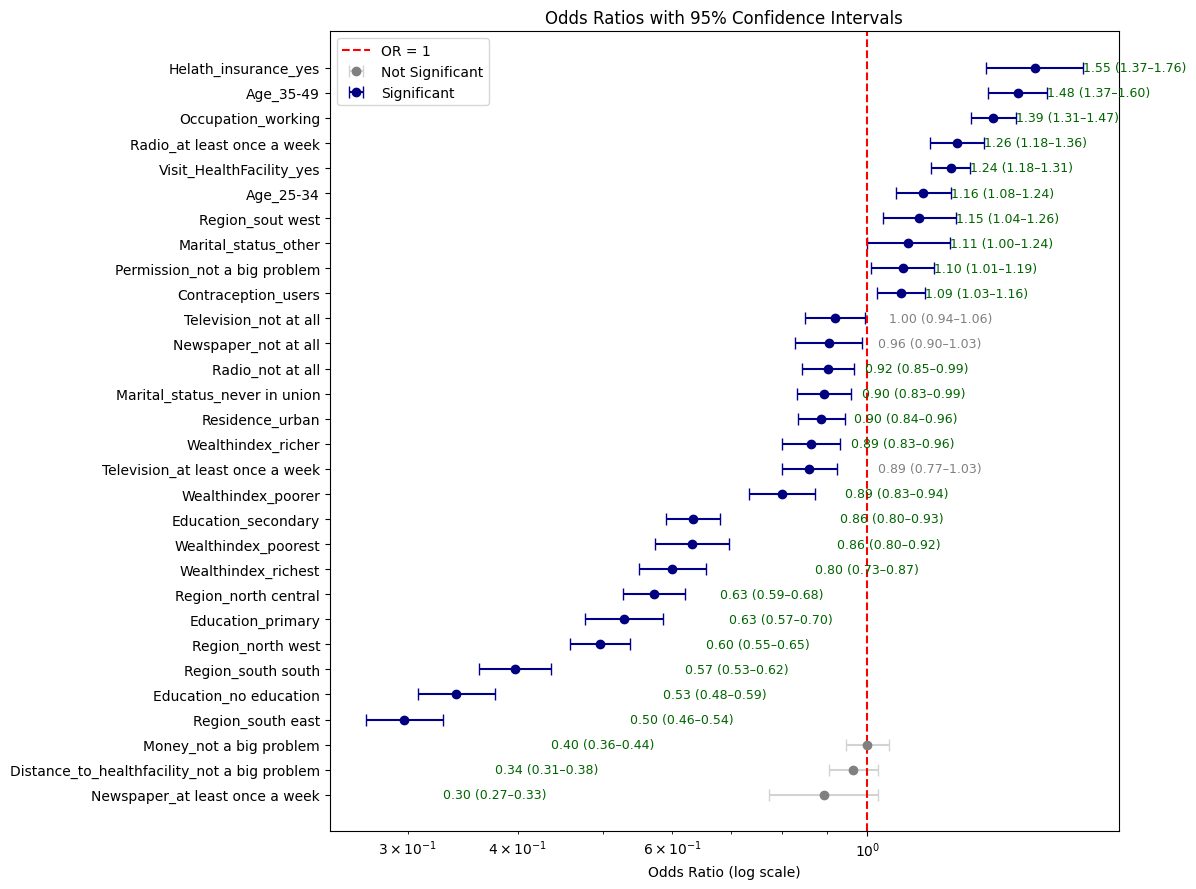

In [63]:
import matplotlib.pyplot as plt

# 1. Sort for cleaner display
odds_ratios_sorted = odds_ratios.sort_values(by='Odds Ratio', ascending=True).reset_index(drop=True)

# 2. Identify significant predictors (CI does not include 1)
odds_ratios_sorted['Significant'] = ~((odds_ratios_sorted['CI Lower'] <= 1) & (odds_ratios_sorted['CI Upper'] >= 1))

# 3. Plot
plt.figure(figsize=(12, 9))

# Separate significant and non-significant for styling
sig = odds_ratios_sorted[odds_ratios_sorted['Significant']]
nonsig = odds_ratios_sorted[~odds_ratios_sorted['Significant']]

# Plot non-significant predictors
plt.errorbar(
    nonsig['Odds Ratio'],
    nonsig['Feature'],
    xerr=[nonsig['Odds Ratio'] - nonsig['CI Lower'], nonsig['CI Upper'] - nonsig['Odds Ratio']],
    fmt='o',
    color='gray',
    ecolor='lightgray',
    capsize=4,
    label='Not Significant'
)

# Plot significant predictors
plt.errorbar(
    sig['Odds Ratio'],
    sig['Feature'],
    xerr=[sig['Odds Ratio'] - sig['CI Lower'], sig['CI Upper'] - sig['Odds Ratio']],
    fmt='o',
    color='navy',
    ecolor='darkblue',
    capsize=4,
    label='Significant'
)

# 4. Annotate each point with OR (95% CI)
for i, row in odds_ratios_sorted.iterrows():
    or_val = row['Odds Ratio']
    ci_low = row['CI Lower']
    ci_up = row['CI Upper']
    label = f"{or_val:.2f} ({ci_low:.2f}–{ci_up:.2f})"
    plt.text(ci_up, i, label, va='center', ha='left', fontsize=9,
             color='darkgreen' if row['Significant'] else 'gray')

# 5. Final touches
plt.axvline(x=1, color='red', linestyle='--', label='OR = 1')
plt.xlabel('Odds Ratio (log scale)')
plt.title('Odds Ratios with 95% Confidence Intervals')
plt.xscale('log')
plt.legend()
plt.tight_layout()
plt.show()
odds_ratios = odds_ratios[odds_ratios['Feature'] != 'const']


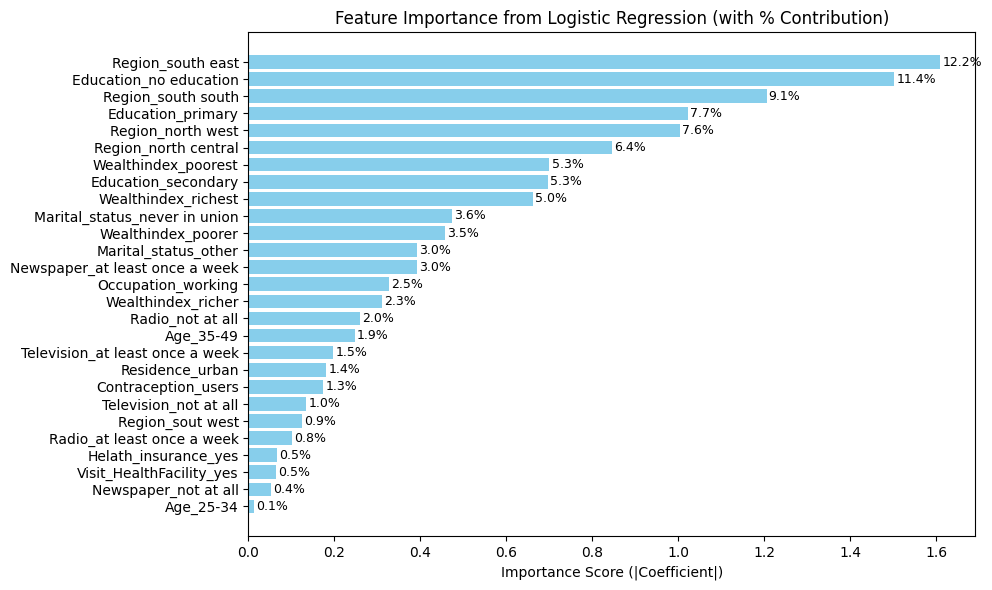

In [35]:
#Feature importance by bargraph
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get and normalize feature importances from logistic regression
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(lr_model.coef_[0])  # Absolute value of coefficients
})
feature_importance = feature_importance.sort_values(by='Importance', ascending=True)
feature_importance['Percentage'] = 100 * feature_importance['Importance'] / feature_importance['Importance'].sum()

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')

# Add percentage labels at the end of each bar
for bar, pct in zip(bars, feature_importance['Percentage']):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
             f'{pct:.1f}%', va='center', fontsize=9)

plt.xlabel('Importance Score (|Coefficient|)')
plt.title('Feature Importance from Logistic Regression (with % Contribution)')
plt.tight_layout()
plt.show()

c:\Users\AUT\AppData\Local\Programs\Python\Python313\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


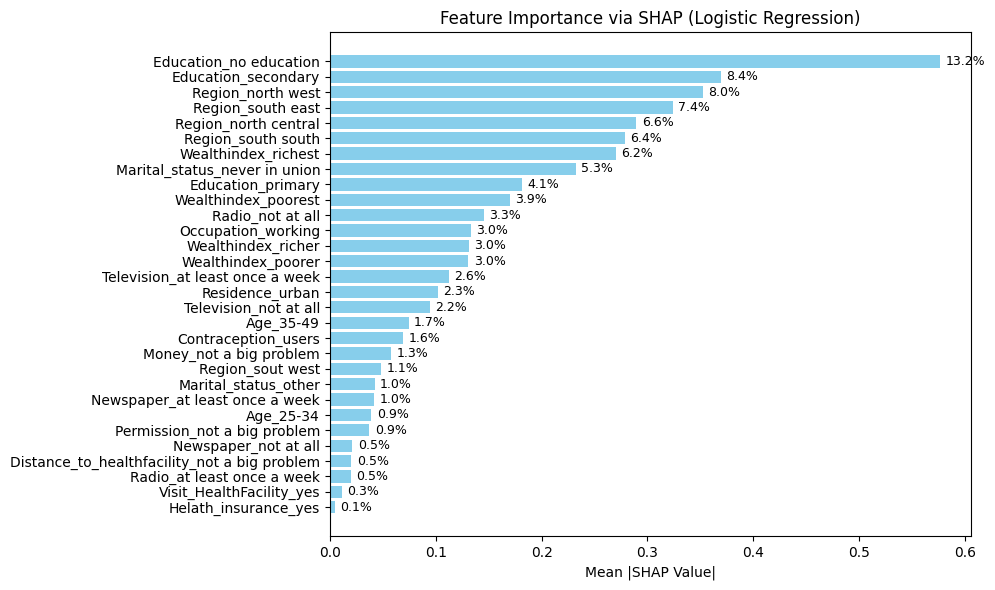

In [64]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
# Fit logistic regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
# Create SHAP explainer for linear models
explainer = shap.Explainer(lr_model, X_train, feature_perturbation="interventional")
# Compute SHAP values
shap_values = explainer(X_train)
# Calculate mean absolute SHAP values for each feature
importance_values = np.abs(shap_values.values).mean(axis=0)
# Create DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance_values
})
feature_importance = feature_importance.sort_values(by='Importance', ascending=True)
feature_importance['Percentage'] = 100 * feature_importance['Importance'] / feature_importance['Importance'].sum()
# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
# Add percentage labels
for bar, pct in zip(bars, feature_importance['Percentage']):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
             f'{pct:.1f}%', va='center', fontsize=9)
plt.xlabel('Mean |SHAP Value|')
plt.title('Feature Importance via SHAP (Logistic Regression)')
plt.tight_layout()
plt.show()

c:\Users\AUT\AppData\Local\Programs\Python\Python313\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


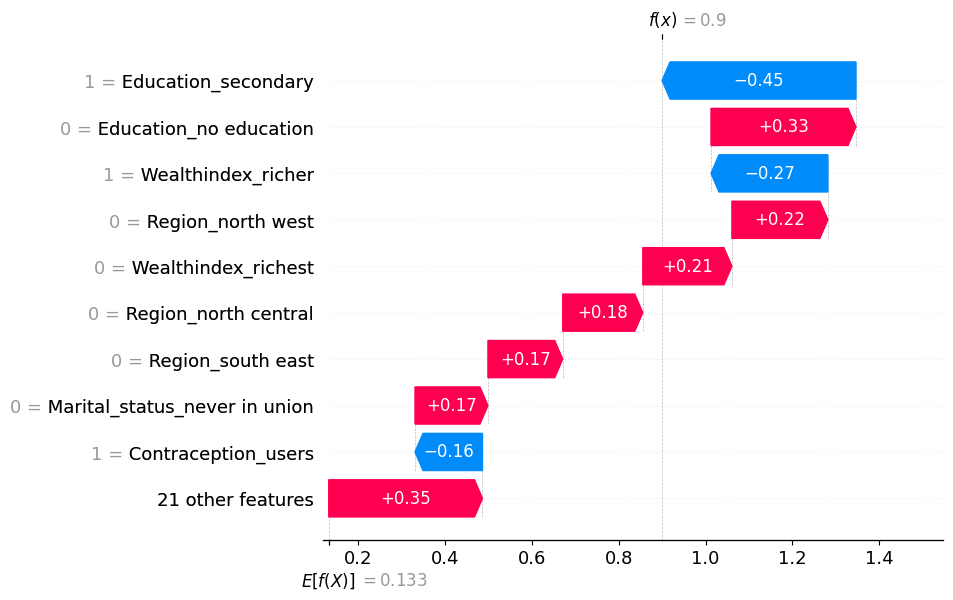

In [65]:
#SHAP using waterfall plot
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Fit logistic regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Create SHAP explainer for linear models
explainer = shap.Explainer(lr_model, X_train, feature_perturbation="interventional")
# Compute SHAP values
shap_values = explainer(X_train)
# Select a sample to explain (e.g., first sample)
sample_index = 0
sample_shap = shap_values[sample_index]
# Plot waterfall for the selected sample
shap.plots.waterfall(sample_shap)

c:\Users\AUT\AppData\Local\Programs\Python\Python313\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


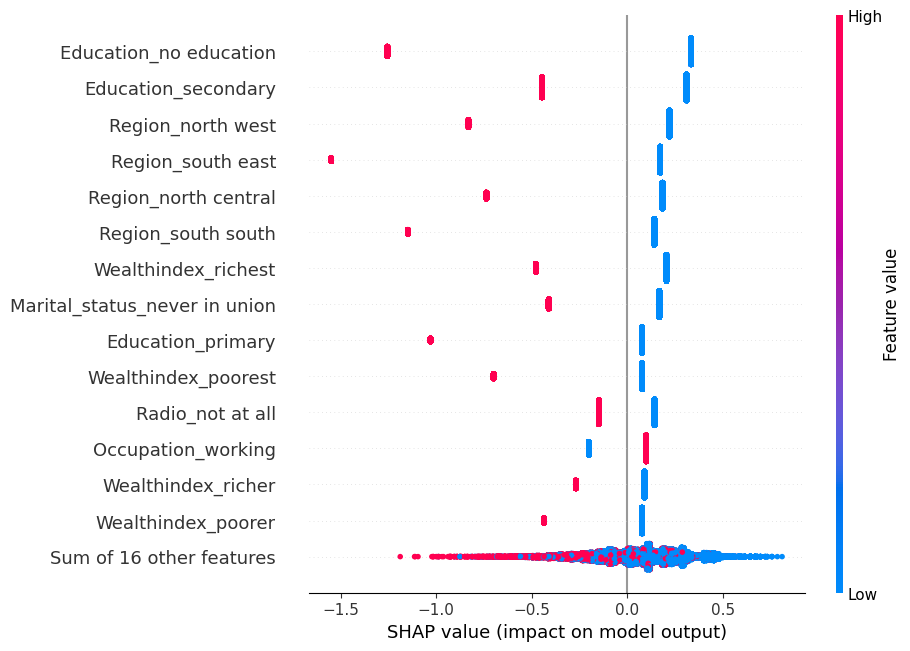

In [66]:
#SHAP using Beeswarm plot
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
# Fit logistic regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
# Create SHAP explainer for linear models
explainer = shap.Explainer(lr_model, X_train, feature_perturbation="interventional")
# Compute SHAP values
shap_values = explainer(X_train)
# Generate beeswarm plot
shap.plots.beeswarm(shap_values, max_display=15)  # You can adjust max_display to show more or fewer features


In [70]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
# Train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
# Make predictions
y_pred_dt = dt_model.predict(X_test)
# Confusion matrix and basic metrics
cm = confusion_matrix(y_test, y_pred_dt)
tn, fp, fn, tp = cm.ravel()
# Core metrics
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
sensitivity = recall_score(y_test, y_pred_dt)  # Recall
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
npv = tn / (tn + fn) if (tn + fn) != 0 else 0
fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
fnr = fn / (fn + tp) if (fn + tp) != 0 else 0
f1 = f1_score(y_test, y_pred_dt)
# Bootstrap to evaluate model performance
n_bootstraps = 1000
rng = np.random.RandomState(42)
accs, precs, recalls, f1s = [], [], [], []
sensitivities, specificities, npvs, fprs, fnrs = [], [], [], [], []
for i in range(n_bootstraps):
    indices = rng.choice(len(y_test), len(y_test), replace=True)
    y_true_boot = y_test.iloc[indices]
    y_pred_boot = y_pred_dt[indices]
    cm_boot = confusion_matrix(y_true_boot, y_pred_boot)
    tn_b, fp_b, fn_b, tp_b = cm_boot.ravel()
    accs.append(accuracy_score(y_true_boot, y_pred_boot))
    precs.append(precision_score(y_true_boot, y_pred_boot))
    recalls.append(recall_score(y_true_boot, y_pred_boot))
    f1s.append(f1_score(y_true_boot, y_pred_boot))
    sensitivities.append(tp_b / (tp_b + fn_b) if (tp_b + fn_b) != 0 else 0)
    specificities.append(tn_b / (tn_b + fp_b) if (tn_b + fp_b) != 0 else 0)
    npvs.append(tn_b / (tn_b + fn_b) if (tn_b + fn_b) != 0 else 0)
    fprs.append(fp_b / (fp_b + tn_b) if (fp_b + tn_b) != 0 else 0)
    fnrs.append(fn_b / (fn_b + tp_b) if (fn_b + tp_b) != 0 else 0)
# CI function
def ci(metric_list):
    return np.percentile(metric_list, [2.5, 97.5])
# Output
print("🔹 Accuracy:", round(accuracy, 3), "95% CI:", np.round(ci(accs), 3))
print("🔹 Precision (PPV):", round(precision, 3), "95% CI:", np.round(ci(precs), 3))
print("🔹 Sensitivity (Recall):", round(sensitivity, 3), "95% CI:", np.round(ci(recalls), 3))
print("🔹 Specificity:", round(specificity, 3), "95% CI:", np.round(ci(specificities), 3))
print("🔹 Negative Predictive Value (NPV):", round(npv, 3), "95% CI:", np.round(ci(npvs), 3))
print("🔹 False Positive Rate (FPR):", round(fpr, 3), "95% CI:", np.round(ci(fprs), 3))
print("🔹 False Negative Rate (FNR):", round(fnr, 3), "95% CI:", np.round(ci(fnrs), 3))
print("🔹 F1 Score:", round(f1, 3), "95% CI:", np.round(ci(f1s), 3))
print("🔹 Confusion Matrix:\n", cm)
print("🔹 Classification Report:\n", classification_report(y_test, y_pred_dt))
print("🔹 True Positives (TP):", tp)
print("🔹 True Negatives (TN):", tn)
print("🔹 False Positives (FP):", fp)
print("🔹 False Negatives (FN):", fn)
#to  estimate AUC
from sklearn.metrics import roc_auc_score
# Get predicted probabilities for the positive class
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]
# Calculate AUC
auc = roc_auc_score(y_test, y_proba_dt)
print("🔹 AUC:", round(auc, 3))


🔹 Accuracy: 0.726 95% CI: [0.717 0.734]
🔹 Precision (PPV): 0.715 95% CI: [0.704 0.726]
🔹 Sensitivity (Recall): 0.75 95% CI: [0.739 0.761]
🔹 Specificity: 0.701 95% CI: [0.689 0.712]
🔹 Negative Predictive Value (NPV): 0.737 95% CI: [0.725 0.75 ]
🔹 False Positive Rate (FPR): 0.299 95% CI: [0.288 0.311]
🔹 False Negative Rate (FNR): 0.25 95% CI: [0.239 0.261]
🔹 F1 Score: 0.732 95% CI: [0.723 0.741]
🔹 Confusion Matrix:
 [[3742 1598]
 [1333 4007]]
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.70      0.72      5340
           1       0.71      0.75      0.73      5340

    accuracy                           0.73     10680
   macro avg       0.73      0.73      0.73     10680
weighted avg       0.73      0.73      0.73     10680

🔹 True Positives (TP): 4007
🔹 True Negatives (TN): 3742
🔹 False Positives (FP): 1598
🔹 False Negatives (FN): 1333
🔹 AUC: 0.753


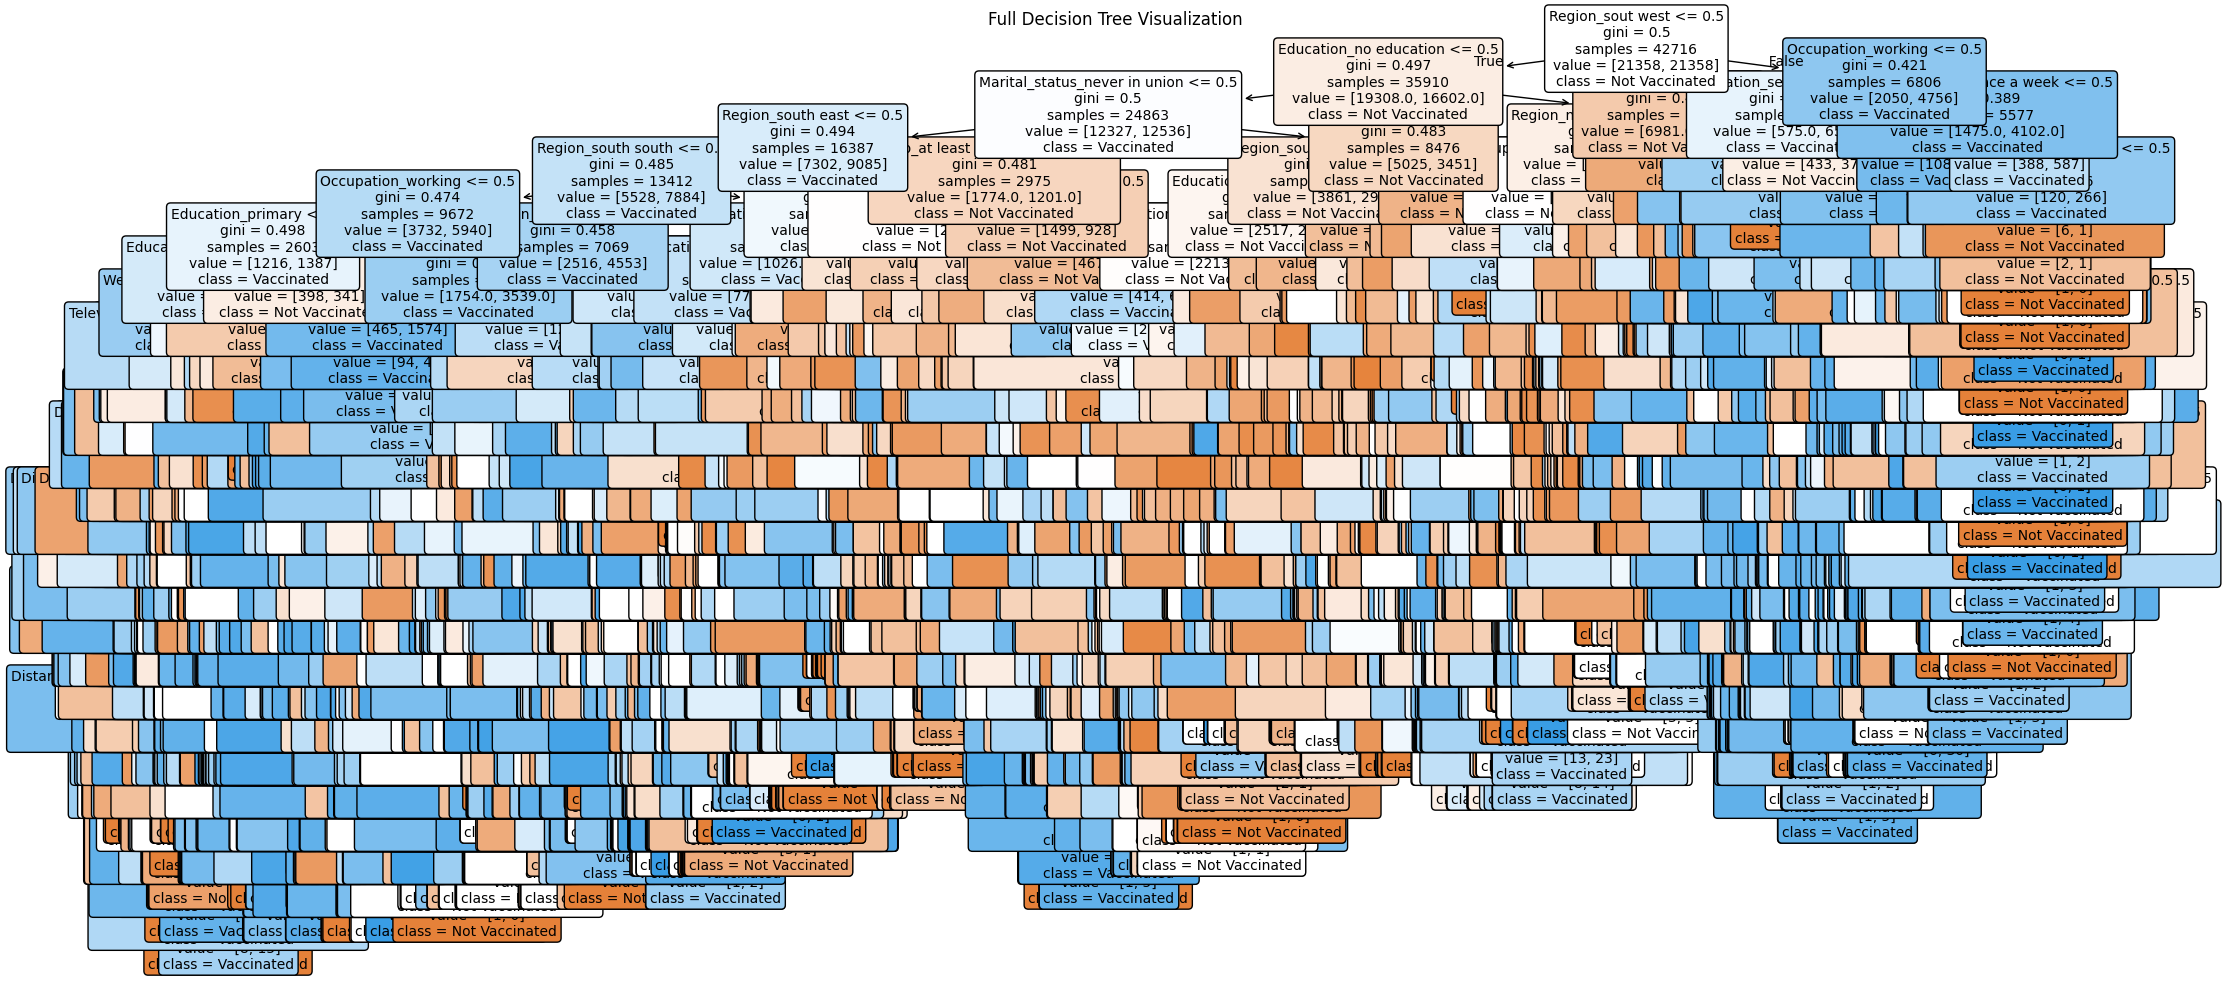

In [68]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(24, 12))  # Adjust size as needed
plot_tree(
    dt_model,
    feature_names=X_train.columns,
    class_names=['Not Vaccinated', 'Vaccinated'],  # Adjust based on your labels
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Full Decision Tree Visualization")
plt.show()

In [71]:
#to display feature importnace based on Gini impurity
import pandas as pd

# Create a DataFrame of feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance (Gini)': dt_model.feature_importances_
}).sort_values(by='Importance (Gini)', ascending=False)

print("🔹 Feature Importances Based on Gini Impurity:")
print(feature_importance_df)

🔹 Feature Importances Based on Gini Impurity:
                                         Feature  Importance (Gini)
23                      Visit_HealthFacility_yes           0.063593
19                       Money_not a big problem           0.061010
13                               Residence_urban           0.060365
27                              Radio_not at all           0.051032
26                    Radio_at least once a week           0.049931
18  Distance_to_healthfacility_not a big problem           0.048317
0                                      Age_25-34           0.048025
22                           Contraception_users           0.044984
25                         Television_not at all           0.044958
9                               Region_sout west           0.040695
12                            Occupation_working           0.040010
16                            Wealthindex_richer           0.039356
24               Television_at least once a week           0.037703
1 

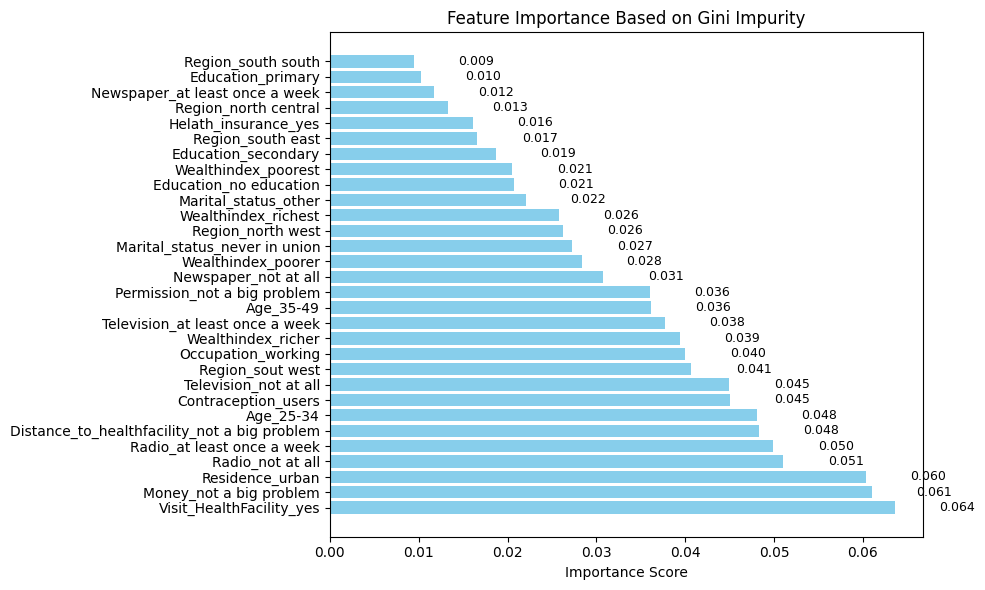

In [75]:
import matplotlib.pyplot as plt

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance (Gini)', ascending=True)

# Plot horizontal bars
plt.figure(figsize=(10, 6))
bars = plt.barh(
    feature_importance_df['Feature'],
    feature_importance_df['Importance (Gini)'],
    color='skyblue'
)

# Annotate each bar with its value
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.005,  # slight offset to the right
        bar.get_y() + bar.get_height() / 2,
        f"{width:.3f}",
        va='center',
        ha='left',
        fontsize=9,
        color='black'
    )

# Final touches
plt.xlabel('Importance Score')
plt.title('Feature Importance Based on Gini Impurity')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [72]:
#by enropy
# Re-train the model using entropy
dt_model_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model_entropy.fit(X_train, y_train)

# Display feature importances based on entropy
feature_importance_entropy_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance (Entropy)': dt_model_entropy.feature_importances_
}).sort_values(by='Importance (Entropy)', ascending=False)

print("🔹 Feature Importances Based on Entropy:")
print(feature_importance_entropy_df)

🔹 Feature Importances Based on Entropy:
                                         Feature  Importance (Entropy)
19                       Money_not a big problem              0.063105
23                      Visit_HealthFacility_yes              0.062825
13                               Residence_urban              0.062468
27                              Radio_not at all              0.053036
18  Distance_to_healthfacility_not a big problem              0.052998
26                    Radio_at least once a week              0.051628
0                                      Age_25-34              0.051239
22                           Contraception_users              0.051035
25                         Television_not at all              0.048978
12                            Occupation_working              0.042841
24               Television_at least once a week              0.041474
16                            Wealthindex_richer              0.040510
1                                    

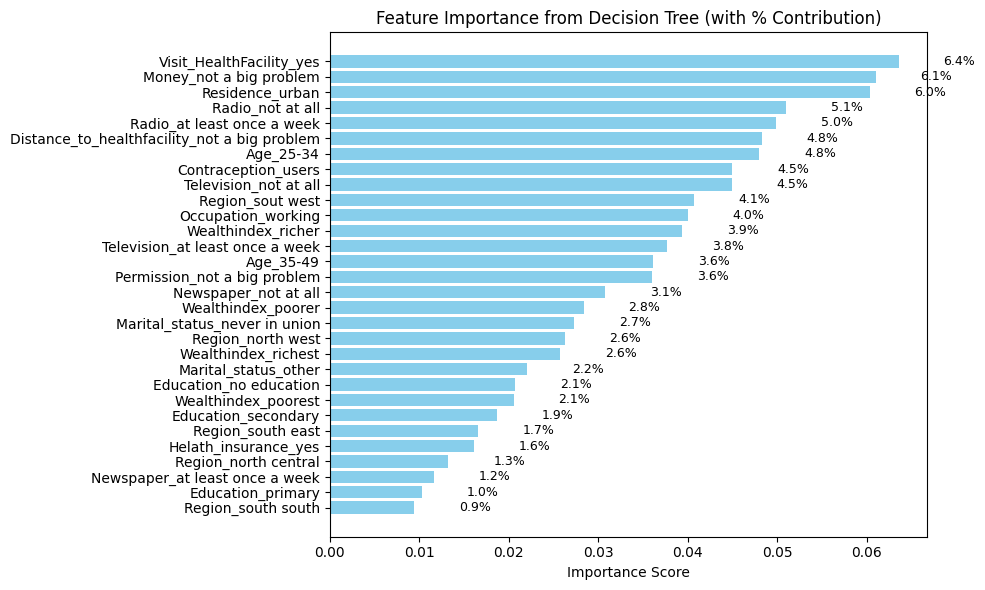

In [77]:
## Get and normalize feature importances
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
})
feature_importance = feature_importance.sort_values(by='Importance', ascending=True)
feature_importance['Percentage'] = 100 * feature_importance['Importance'] / feature_importance['Importance'].sum()
# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')

# Add percentage labels at the end of each bar
for bar, pct in zip(bars, feature_importance['Percentage']):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
             f'{pct:.1f}%', va='center', fontsize=9)

plt.xlabel('Importance Score')
plt.title('Feature Importance from Decision Tree (with % Contribution)')
plt.tight_layout()
plt.show()

In [80]:
#Random forest
#import and initialize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
# Make predictions
y_pred_rf = rf_model.predict(X_test)
# Confusion matrix and basic metrics
cm = confusion_matrix(y_test, y_pred_rf)
tn, fp, fn, tp = cm.ravel()
# Core metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
sensitivity = recall_score(y_test, y_pred_rf)  # Recall
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
npv = tn / (tn + fn) if (tn + fn) != 0 else 0
fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
fnr = fn / (fn + tp) if (fn + tp) != 0 else 0
f1 = f1_score(y_test, y_pred_rf)
# Bootstrap
n_bootstraps = 100
rng = np.random.RandomState(42)
accs, precs, recalls, f1s = [], [], [], []
sensitivities, specificities, npvs, fprs, fnrs = [], [], [], [], []
for i in range(n_bootstraps):
    indices = rng.choice(len(y_test), len(y_test), replace=True)
    y_true_boot = y_test.iloc[indices]
    y_pred_boot = y_pred_rf[indices]
    cm_boot = confusion_matrix(y_true_boot, y_pred_boot)
    tn_b, fp_b, fn_b, tp_b = cm_boot.ravel()
    accs.append(accuracy_score(y_true_boot, y_pred_boot))
    precs.append(precision_score(y_true_boot, y_pred_boot))
    recalls.append(recall_score(y_true_boot, y_pred_boot))
    f1s.append(f1_score(y_true_boot, y_pred_boot))
    sensitivities.append(tp_b / (tp_b + fn_b) if (tp_b + fn_b) != 0 else 0)
    specificities.append(tn_b / (tn_b + fp_b) if (tn_b + fp_b) != 0 else 0)
    npvs.append(tn_b / (tn_b + fn_b) if (tn_b + fn_b) != 0 else 0)
    fprs.append(fp_b / (fp_b + tn_b) if (fp_b + tn_b) != 0 else 0)
    fnrs.append(fn_b / (fn_b + tp_b) if (fn_b + tp_b) != 0 else 0)
# CI function
def ci(metric_list):
    return np.percentile(metric_list, [2.5, 97.5])
# Output
print("🔹 Accuracy:", round(accuracy, 3), "95% CI:", np.round(ci(accs), 3))
print("🔹 Precision (PPV):", round(precision, 3), "95% CI:", np.round(ci(precs), 3))
print("🔹 Sensitivity (Recall):", round(sensitivity, 3), "95% CI:", np.round(ci(recalls), 3))
print("🔹 Specificity:", round(specificity, 3), "95% CI:", np.round(ci(specificities), 3))
print("🔹 Negative Predictive Value (NPV):", round(npv, 3), "95% CI:", np.round(ci(npvs), 3))
print("🔹 False Positive Rate (FPR):", round(fpr, 3), "95% CI:", np.round(ci(fprs), 3))
print("🔹 False Negative Rate (FNR):", round(fnr, 3), "95% CI:", np.round(ci(fnrs), 3))
print("🔹 F1 Score:", round(f1, 3), "95% CI:", np.round(ci(f1s), 3))
print("🔹 Confusion Matrix:\n", cm)
print("🔹 Classification Report:\n", classification_report(y_test, y_pred_rf))
print("🔹 True Positives (TP):", tp)
print("🔹 True Negatives (TN):", tn)
print("🔹 False Positives (FP):", fp)
print("🔹 False Negatives (FN):", fn)
#to  estimate AUC
from sklearn.metrics import roc_auc_score
# Get predicted probabilities for the positive class
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
# Calculate AUC
auc = roc_auc_score(y_test, y_proba_rf)
print("🔹 AUC:", round(auc, 3))

🔹 Accuracy: 0.751 95% CI: [0.742 0.757]
🔹 Precision (PPV): 0.737 95% CI: [0.727 0.746]
🔹 Sensitivity (Recall): 0.779 95% CI: [0.768 0.79 ]
🔹 Specificity: 0.722 95% CI: [0.71  0.733]
🔹 Negative Predictive Value (NPV): 0.766 95% CI: [0.756 0.778]
🔹 False Positive Rate (FPR): 0.278 95% CI: [0.267 0.29 ]
🔹 False Negative Rate (FNR): 0.221 95% CI: [0.21  0.232]
🔹 F1 Score: 0.758 95% CI: [0.747 0.764]
🔹 Confusion Matrix:
 [[3858 1482]
 [1180 4160]]
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74      5340
           1       0.74      0.78      0.76      5340

    accuracy                           0.75     10680
   macro avg       0.75      0.75      0.75     10680
weighted avg       0.75      0.75      0.75     10680

🔹 True Positives (TP): 4160
🔹 True Negatives (TN): 3858
🔹 False Positives (FP): 1482
🔹 False Negatives (FN): 1180
🔹 AUC: 0.828


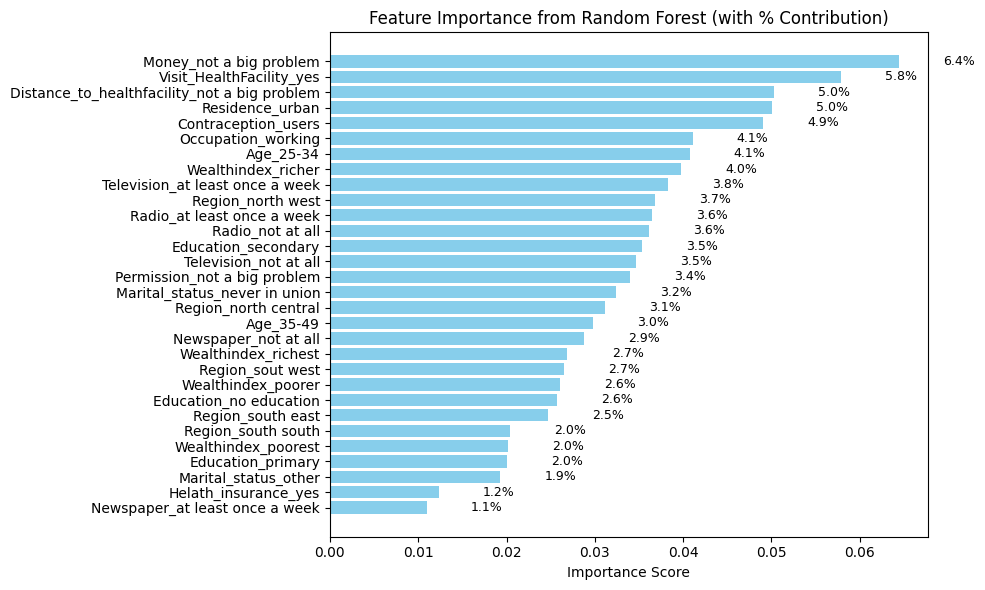

In [81]:
# Get and normalize feature importances
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values(by='Importance', ascending=True)
feature_importance['Percentage'] = 100 * feature_importance['Importance'] / feature_importance['Importance'].sum()
# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
# Add percentage labels at the end of each bar
for bar, pct in zip(bars, feature_importance['Percentage']):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
             f'{pct:.1f}%', va='center', fontsize=9)
    plt.xlabel('Importance Score')
plt.title('Feature Importance from Random Forest (with % Contribution)')
plt.tight_layout()
plt.show()

In [ ]:
# SHAP using beeswarm plot for Random Forest
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Fit Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Create SHAP explainer for tree-based models
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer(X_train)
# Plot beeswarm to show feature impact across all samples
shap.plots.beeswarm(shap_values)

In [ ]:
# SHAP using waterfall plot for Random Forest
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
# Fit Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Create SHAP explainer for tree-based models
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer(X_train)
# Select a sample to explain (e.g., first sample)
sample_index = 0
sample_shap = shap_values[sample_index]
# Plot waterfall for the selected sample
shap.plots.waterfall(sample_shap)

In [ ]:
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# 1. Fit Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 2. Create SHAP explainer for tree-based models
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train)

# 3. Select a sample to explain (e.g., first sample)
sample_index = 0
sample_shap = shap.Explanation(
    values=shap_values[1][sample_index],
    base_values=explainer.expected_value[1],
    data=X_train.iloc[sample_index],
    feature_names=X_train.columns
)

# 4. Plot waterfall for the selected sample
shap.plots.waterfall(sample_shap)

In [19]:
#3K-NeighborsClassifier
#Import and initialize
knn_model = KNeighborsClassifier(n_neighbors=6)
#Fit the model
knn_model.fit(X_train, y_train)
#Make predictions
y_pred_knn = knn_model.predict(X_test)
#Evaluate performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Confusion matrix and basic metrics
cm = confusion_matrix(y_test, y_pred_knn)
tn, fp, fn, tp = cm.ravel()
# Core metrics
accuracy = accuracy_score(y_test, y_pred_knn)
sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0  # Recall
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
precision = tp / (tp + fp) if (tp + fp) != 0 else 0  # PPV
npv = tn / (tn + fn) if (tn + fn) != 0 else 0
fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
fnr = fn / (fn + tp) if (fn + tp) != 0 else 0
f1 = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0
# Output
print("🔹 Accuracy:", round(accuracy, 3))
print("🔹 Confusion Matrix:\n", cm)
print("🔹 Classification Report:\n", classification_report(y_test, y_pred_knn))
print("🔹 True Positives (TP):", tp)
print("🔹 True Negatives (TN):", tn)
print("🔹 False Positives (FP):", fp)
print("🔹 False Negatives (FN):", fn)
print("🔹 Sensitivity (Recall):", round(sensitivity, 3))
print("🔹 Specificity:", round(specificity, 3))
print("🔹 Precision (PPV):", round(precision, 3))
print("🔹 Negative Predictive Value (NPV):", round(npv, 3))
print("🔹 False Positive Rate (FPR):", round(fpr, 3))
print("🔹 False Negative Rate (FNR):", round(fnr, 3))
print("🔹 F1 Score:", round(f1, 3))
# Bootstrap
n_bootstraps = 1000
rng = np.random.RandomState(42)
accs, precs, recalls, f1s = [], [], [], []
sensitivities, specificities, npvs, fprs, fnrs = [], [], [], [], []
for i in range(n_bootstraps):
    indices = rng.choice(len(y_test), len(y_test), replace=True)
    y_true_boot = y_test.iloc[indices]
    y_pred_boot = y_pred_knn[indices]
    cm_boot = confusion_matrix(y_true_boot, y_pred_boot)
    tn_b, fp_b, fn_b, tp_b = cm_boot.ravel()
    accs.append(accuracy_score(y_true_boot, y_pred_boot))
    precs.append(tp_b / (tp_b + fp_b) if (tp_b + fp_b) != 0 else 0)
    recalls.append(tp_b / (tp_b + fn_b) if (tp_b + fn_b) != 0 else 0)
    f1s.append(2 * precs[-1] * recalls[-1] / (precs[-1] + recalls[-1]) if (precs[-1] + recalls[-1]) != 0 else 0)
    sensitivities.append(tp_b / (tp_b + fn_b) if (tp_b + fn_b) != 0 else 0)
    specificities.append(tn_b / (tn_b + fp_b) if (tn_b + fp_b) != 0 else 0)
    npvs.append(tn_b / (tn_b + fn_b) if (tn_b + fn_b) != 0 else 0)
    fprs.append(fp_b / (fp_b + tn_b) if (fp_b + tn_b) != 0 else 0)
    fnrs.append(fn_b / (fn_b + tp_b) if (fn_b + tp_b) != 0 else 0)
# CI function
def ci(metric_list):
    return np.percentile(metric_list, [2.5, 97.5])
# Output
print("🔹 Accuracy:", round(accuracy, 3), "95% CI:", np.round(ci(accs), 3))
print("🔹 Precision (PPV):", round(precision, 3), "95% CI:", np.round(ci(precs), 3))
print("🔹 Sensitivity (Recall):", round(sensitivity, 3), "95% CI:", np.round(ci(recalls), 3))
print("🔹 Specificity:", round(specificity, 3), "95% CI:", np.round(ci(specificities), 3))
print("🔹 Negative Predictive Value (NPV):", round(npv, 3), "95% CI:", np.round(ci(npvs), 3))
print("🔹 False Positive Rate (FPR):", round(fpr, 3), "95% CI:", np.round(ci(fprs), 3))
print("🔹 False Negative Rate (FNR):", round(fnr, 3), "95% CI:", np.round(ci(fnrs), 3))
print("🔹 F1 Score:", round(f1, 3), "95% CI:", np.round(ci(f1s), 3))
print("🔹 Confusion Matrix:\n", cm)
print("🔹 Classification Report:\n", classification_report(y_test, y_pred_knn))
print("🔹 True Positives (TP):", tp)
print("🔹 True Negatives (TN):", tn)
print("🔹 False Positives (FP):", fp)
print("🔹 False Negatives (FN):", fn)

#to  estimate AUC
from sklearn.metrics import roc_auc_score
# Get predicted probabilities for the positive class
y_proba_knn = knn_model.predict_proba(X_test)[:, 1]
# Calculate AUC
auc = roc_auc_score(y_test, y_proba_knn)
print("🔹 AUC:", round(auc, 3))

🔹 Accuracy: 0.713
🔹 Confusion Matrix:
 [[3813 1527]
 [1541 3799]]
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71      5340
           1       0.71      0.71      0.71      5340

    accuracy                           0.71     10680
   macro avg       0.71      0.71      0.71     10680
weighted avg       0.71      0.71      0.71     10680

🔹 True Positives (TP): 3799
🔹 True Negatives (TN): 3813
🔹 False Positives (FP): 1527
🔹 False Negatives (FN): 1541
🔹 Sensitivity (Recall): 0.711
🔹 Specificity: 0.714
🔹 Precision (PPV): 0.713
🔹 Negative Predictive Value (NPV): 0.712
🔹 False Positive Rate (FPR): 0.286
🔹 False Negative Rate (FNR): 0.289
🔹 F1 Score: 0.712
🔹 Accuracy: 0.713 95% CI: [0.704 0.722]
🔹 Precision (PPV): 0.713 95% CI: [0.702 0.725]
🔹 Sensitivity (Recall): 0.711 95% CI: [0.7   0.724]
🔹 Specificity: 0.714 95% CI: [0.702 0.726]
🔹 Negative Predictive Value (NPV): 0.712 95% CI: [0.701 0.725]
🔹 False Positive 

In [ ]:
#optional:Tune k for Best Performanc
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"k={k}, Accuracy={score:.3f}")


k=1, Accuracy=0.705
k=2, Accuracy=0.695
k=3, Accuracy=0.708
k=4, Accuracy=0.712
k=5, Accuracy=0.712
k=6, Accuracy=0.713
k=7, Accuracy=0.702
k=8, Accuracy=0.707
k=9, Accuracy=0.700
k=10, Accuracy=0.702
k=11, Accuracy=0.696
k=12, Accuracy=0.695
k=13, Accuracy=0.691
k=14, Accuracy=0.696
k=15, Accuracy=0.693
k=16, Accuracy=0.691
k=17, Accuracy=0.689
k=18, Accuracy=0.689
k=19, Accuracy=0.688
k=20, Accuracy=0.686


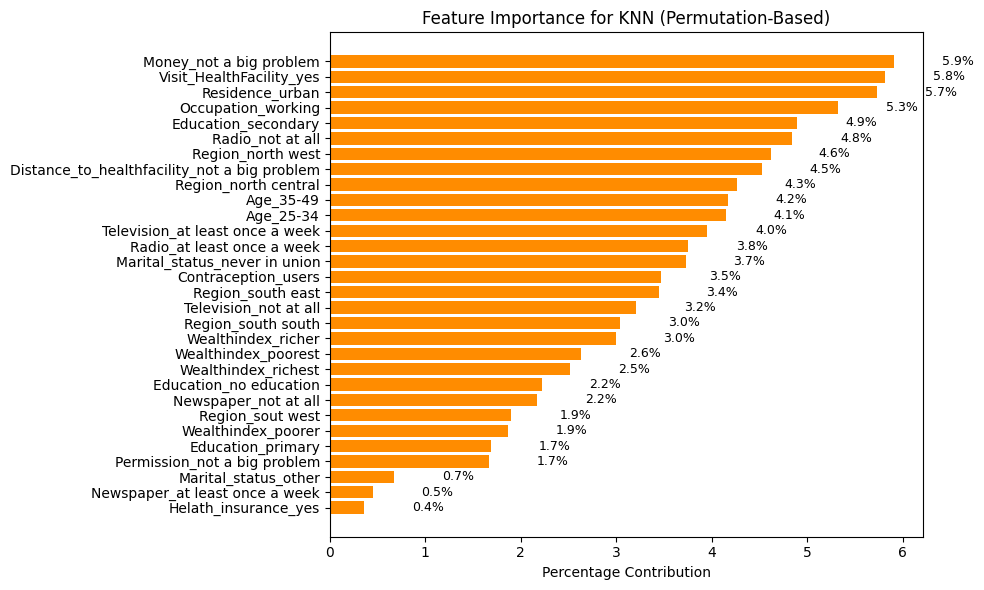

In [ ]:
#premutation feature importance
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd
# Fit KNN model
knn_model.fit(X_train, y_train)
# Compute permutation importance
result = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=42)
# Format results
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=True)
# Normalize to percentage
importance_df['Percentage'] = 100 * importance_df['Importance'] / importance_df['Importance'].sum()
# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(importance_df['Feature'], importance_df['Percentage'], color='darkorange')
for bar, pct in zip(bars, importance_df['Percentage']):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{pct:.1f}%', va='center', fontsize=9)
plt.xlabel('Percentage Contribution')
plt.title('Feature Importance for KNN (Permutation-Based)')
plt.tight_layout()
plt.show()

In [20]:
#4 Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
# Import and initialize
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
# Make predictions
y_pred_gb = gb_model.predict(X_test)
# Confusion matrix and basic metrics
cm = confusion_matrix(y_test, y_pred_gb)
tn, fp, fn, tp = cm.ravel()
# Core metrics
accuracy = accuracy_score(y_test, y_pred_gb)
sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0  # Recall
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
precision = tp / (tp + fp) if (tp + fp) != 0 else 0  # PPV
npv = tn / (tn + fn) if (tn + fn) != 0 else 0
fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
fnr = fn / (fn + tp) if (fn + tp) != 0 else 0
f1 = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0
# Bootstrap
n_bootstraps = 1000
rng = np.random.RandomState(42)
accs, precs, recalls, f1s = [], [], [], []
sensitivities, specificities, npvs, fprs, fnrs = [], [], [], [], []
for i in range(n_bootstraps):
    indices = rng.choice(len(y_test), len(y_test), replace=True)
    y_true_boot = y_test.iloc[indices]
    y_pred_boot = y_pred_gb[indices]
    cm_boot = confusion_matrix(y_true_boot, y_pred_boot)
    tn_b, fp_b, fn_b, tp_b = cm_boot.ravel()
    accs.append(accuracy_score(y_true_boot, y_pred_boot))
    precs.append(tp_b / (tp_b + fp_b) if (tp_b + fp_b) != 0 else 0)
    recalls.append(tp_b / (tp_b + fn_b) if (tp_b + fn_b) != 0 else 0)
    f1s.append(2 * precs[-1] * recalls[-1] / (precs[-1] + recalls[-1]) if (precs[-1] + recalls[-1]) != 0 else 0)
    sensitivities.append(tp_b / (tp_b + fn_b) if (tp_b + fn_b) != 0 else 0)
    specificities.append(tn_b / (tn_b + fp_b) if (tn_b + fp_b) != 0 else 0)
    npvs.append(tn_b / (tn_b + fn_b) if (tn_b + fn_b) != 0 else 0)
    fprs.append(fp_b / (fp_b + tn_b) if (fp_b + tn_b) != 0 else 0)
    fnrs.append(fn_b / (fn_b + tp_b) if (fn_b + tp_b) != 0 else 0)
# CI function
def ci(metric_list):
    return np.percentile(metric_list, [2.5, 97.5])
# Output
print("🔹 Accuracy:", round(accuracy, 3), "95% CI:", np.round(ci(accs), 3))
print("🔹 Precision (PPV):", round(precision, 3), "95% CI:", np.round(ci(precs), 3))
print("🔹 Sensitivity (Recall):", round(sensitivity, 3), "95% CI:", np.round(ci(recalls), 3))
print("🔹 Specificity:", round(specificity, 3), "95% CI:", np.round(ci(specificities), 3))
print("🔹 Negative Predictive Value (NPV):", round(npv, 3), "95% CI:", np.round(ci(npvs), 3))
print("🔹 False Positive Rate (FPR):", round(fpr, 3), "95% CI:", np.round(ci(fprs), 3))
print("🔹 False Negative Rate (FNR):", round(fnr, 3), "95% CI:", np.round(ci(fnrs), 3))
print("🔹 F1 Score:", round(f1, 3), "95% CI:", np.round(ci(f1s), 3))
print("🔹 Confusion Matrix:\n", cm)
print("🔹 Classification Report:\n", classification_report(y_test, y_pred_gb))
print("🔹 True Positives (TP):", tp)
print("🔹 True Negatives (TN):", tn)
print("🔹 False Positives (FP):", fp)
print("🔹 False Negatives (FN):", fn)

#to  estimate AUC
from sklearn.metrics import roc_auc_score
# Get predicted probabilities for the positive class
y_proba_gb = gb_model.predict_proba(X_test)[:, 1]
# Calculate AUC
auc = roc_auc_score(y_test, y_proba_gb)
print("🔹 AUC:", round(auc, 3))

🔹 Accuracy: 0.666 95% CI: [0.657 0.676]
🔹 Precision (PPV): 0.662 95% CI: [0.65  0.675]
🔹 Sensitivity (Recall): 0.677 95% CI: [0.664 0.69 ]
🔹 Specificity: 0.655 95% CI: [0.642 0.668]
🔹 Negative Predictive Value (NPV): 0.67 95% CI: [0.657 0.682]
🔹 False Positive Rate (FPR): 0.345 95% CI: [0.332 0.358]
🔹 False Negative Rate (FNR): 0.323 95% CI: [0.31  0.336]
🔹 F1 Score: 0.67 95% CI: [0.659 0.68 ]
🔹 Confusion Matrix:
 [[3496 1844]
 [1723 3617]]
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.65      0.66      5340
           1       0.66      0.68      0.67      5340

    accuracy                           0.67     10680
   macro avg       0.67      0.67      0.67     10680
weighted avg       0.67      0.67      0.67     10680

🔹 True Positives (TP): 3617
🔹 True Negatives (TN): 3496
🔹 False Positives (FP): 1844
🔹 False Negatives (FN): 1723
🔹 AUC: 0.724


C:\Users\AUT\AppData\Local\Temp\ipykernel_28328\3274041666.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Importance (%)', y='Feature', data=feature_importance, palette='viridis')


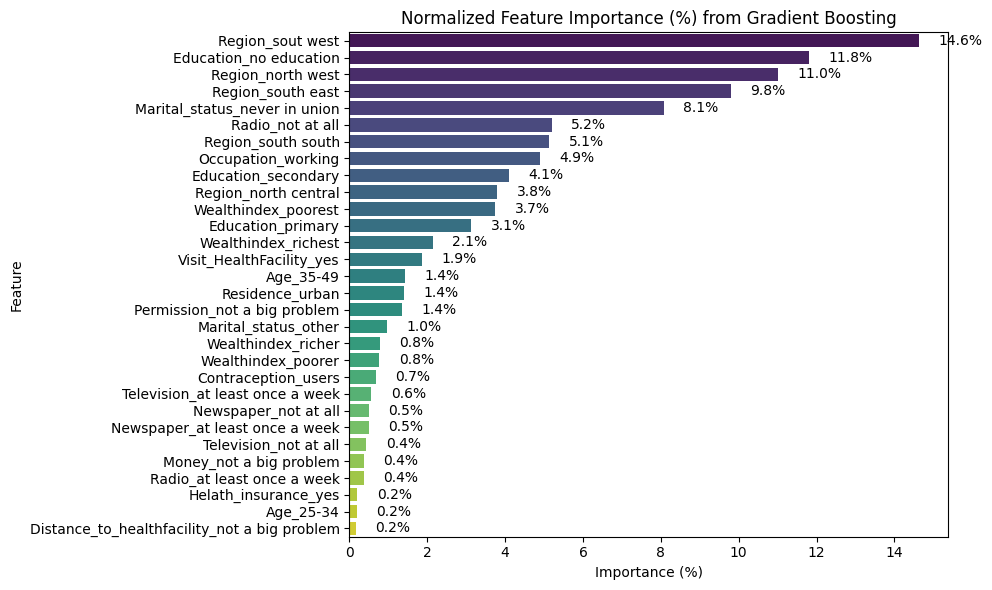

In [ ]:
#Feature Importance for gardient boosting
# Normalize importance to percentages
importance_raw = gb_model.feature_importances_
importance_percent = 100 * (importance_raw / importance_raw.sum())
# Create DataFrame
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance (%)': importance_percent
}).sort_values(by='Importance (%)', ascending=False)
# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Importance (%)', y='Feature', data=feature_importance, palette='viridis')
plt.title('Normalized Feature Importance (%) from Gradient Boosting')

# Add percentage labels on top of each bar
for i, (value) in enumerate(feature_importance['Importance (%)']):
    ax.text(value + 0.5, i, f'{value:.1f}%', va='center')

plt.tight_layout()
plt.show()


 99%|===================| 42427/42716 [00:57<00:00]        

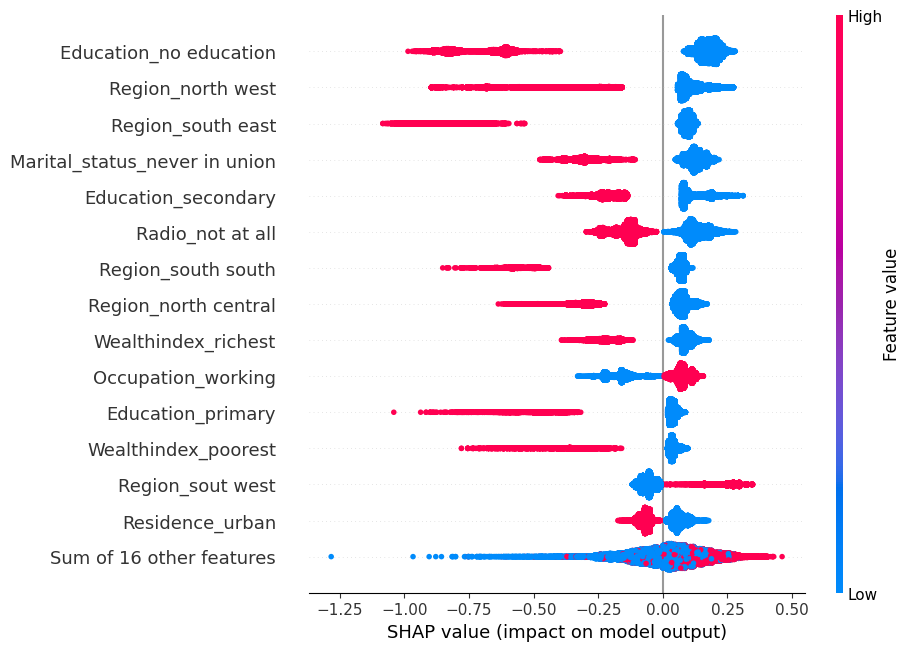

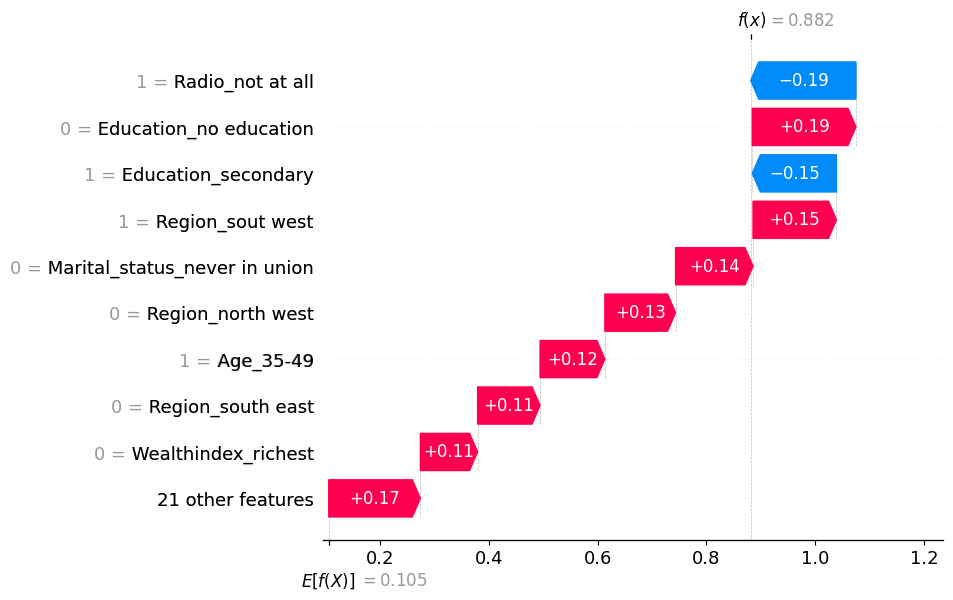

In [ ]:
#Feature contribution in the Gradient boosting algorithm using Beeswarm and watrefall plots
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
# Fit Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
# Create SHAP explainer for tree-based models
explainer = shap.Explainer(gb_model, X_train)
# Compute SHAP values
shap_values = explainer(X_train)
# Beeswarm plot (global feature impact)
shap.plots.beeswarm(shap_values, max_display=15)
# Waterfall plot (individual prediction explanation)
sample_index = 0
sample_shap = shap_values[sample_index]
shap.plots.waterfall(sample_shap)

In [21]:
#5XGBoost Classifier with Bootstrapped 95% Confidence Intervals
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
# Import and initialize
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
# Confusion matrix and basic metrics
cm = confusion_matrix(y_test, y_pred_xgb)
tn, fp, fn, tp = cm.ravel()
# Core metrics
accuracy = accuracy_score(y_test, y_pred_xgb)
sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0  # Recall
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
precision = tp / (tp + fp) if (tp + fp) != 0 else 0  # PPV
npv = tn / (tn + fn) if (tn + fn) != 0 else 0
fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
fnr = fn / (fn + tp) if (fn + tp) != 0 else 0
f1 = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0
# Bootstrap
n_bootstraps = 1000
rng = np.random.RandomState(42)
accs, precs, recalls, f1s = [], [], [], []
sensitivities, specificities, npvs, fprs, fnrs = [], [], [], [], []
for i in range(n_bootstraps):
    indices = rng.choice(len(y_test), len(y_test), replace=True)
    y_true_boot = y_test.iloc[indices]
    y_pred_boot = y_pred_xgb[indices]
    cm_boot = confusion_matrix(y_true_boot, y_pred_boot)
    tn_b, fp_b, fn_b, tp_b = cm_boot.ravel()
    accs.append(accuracy_score(y_true_boot, y_pred_boot))
    precs.append(tp_b / (tp_b + fp_b) if (tp_b + fp_b) != 0 else 0)
    recalls.append(tp_b / (tp_b + fn_b) if (tp_b + fn_b) != 0 else 0)
    f1s.append(2 * precs[-1] * recalls[-1] / (precs[-1] + recalls[-1]) if (precs[-1] + recalls[-1]) != 0 else 0)
    sensitivities.append(tp_b / (tp_b + fn_b) if (tp_b + fn_b) != 0 else 0)
    specificities.append(tn_b / (tn_b + fp_b) if (tn_b + fp_b) != 0 else 0)
    npvs.append(tn_b / (tn_b + fn_b) if (tn_b + fn_b) != 0 else 0)
    fprs.append(fp_b / (fp_b + tn_b) if (fp_b + tn_b) != 0 else 0)
    fnrs.append(fn_b / (fn_b + tp_b) if (fn_b + tp_b) != 0 else 0)
# CI function
def ci(metric_list):
    return np.percentile(metric_list, [2.5, 97.5])
# Output
print("🔹 Accuracy:", round(accuracy, 3), "95% CI:", np.round(ci(accs), 3))
print("🔹 Precision (PPV):", round(precision, 3), "95% CI:", np.round(ci(precs), 3))
print("🔹 Sensitivity (Recall):", round(sensitivity, 3), "95% CI:", np.round(ci(recalls), 3))
print("🔹 Specificity:", round(specificity, 3), "95% CI:", np.round(ci(specificities), 3))
print("🔹 Negative Predictive Value (NPV):", round(npv, 3), "95% CI:", np.round(ci(npvs), 3))
print("🔹 False Positive Rate (FPR):", round(fpr, 3), "95% CI:", np.round(ci(fprs), 3))
print("🔹 False Negative Rate (FNR):", round(fnr, 3), "95% CI:", np.round(ci(fnrs), 3))
print("🔹 F1 Score:", round(f1, 3), "95% CI:", np.round(ci(f1s), 3))
print("🔹 Confusion Matrix:\n", cm)
print("🔹 Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("🔹 True Positives (TP):", tp)
print("🔹 True Negatives (TN):", tn)
print("🔹 False Positives (FP):", fp)
print("🔹 False Negatives (FN):", fn)
#to  estimate AUC
from sklearn.metrics import roc_auc_score
# Get predicted probabilities for the positive class
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
# Calculate AUC
auc = roc_auc_score(y_test, y_proba_xgb)
print("🔹 AUC:", round(auc, 3))

c:\Users\AUT\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:33:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🔹 Accuracy: 0.704 95% CI: [0.695 0.713]
🔹 Precision (PPV): 0.695 95% CI: [0.683 0.707]
🔹 Sensitivity (Recall): 0.727 95% CI: [0.715 0.739]
🔹 Specificity: 0.681 95% CI: [0.669 0.694]
🔹 Negative Predictive Value (NPV): 0.714 95% CI: [0.701 0.726]
🔹 False Positive Rate (FPR): 0.319 95% CI: [0.306 0.331]
🔹 False Negative Rate (FNR): 0.273 95% CI: [0.261 0.285]
🔹 F1 Score: 0.71 95% CI: [0.7  0.72]
🔹 Confusion Matrix:
 [[3637 1703]
 [1460 3880]]
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.68      0.70      5340
           1       0.69      0.73      0.71      5340

    accuracy                           0.70     10680
   macro avg       0.70      0.70      0.70     10680
weighted avg       0.70      0.70      0.70     10680

🔹 True Positives (TP): 3880
🔹 True Negatives (TN): 3637
🔹 False Positives (FP): 1703
🔹 False Negatives (FN): 1460
🔹 AUC: 0.773


C:\Users\AUT\AppData\Local\Temp\ipykernel_28328\662664979.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Importance (%)', y='Feature', data=feature_importance, palette='viridis')


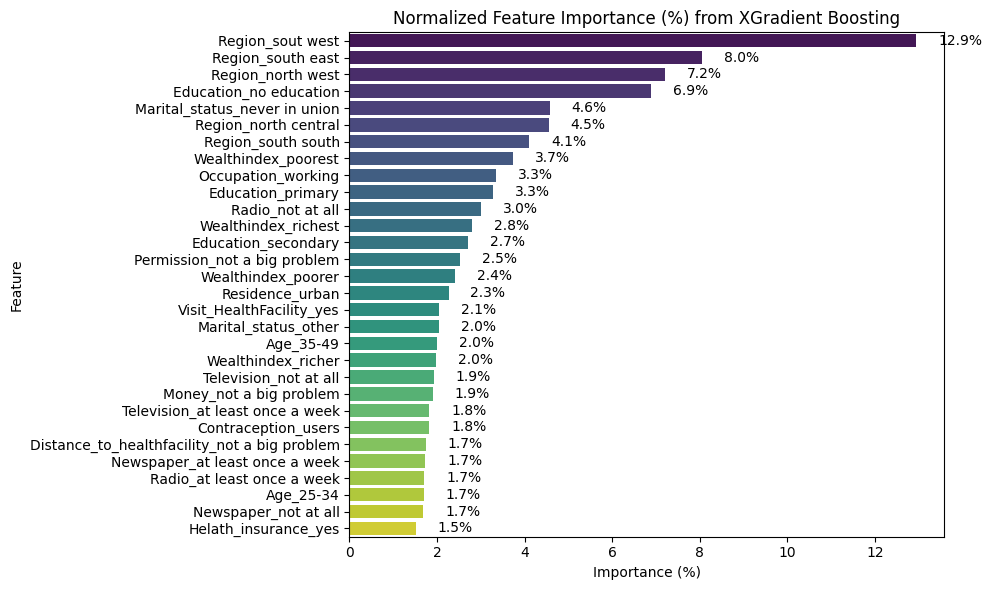

In [ ]:
#Feature Importance for Xgardient boosting
# Normalize importance to percentages
importance_raw = xgb_model.feature_importances_
importance_percent = 100 * (importance_raw / importance_raw.sum())
# Create DataFrame
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance (%)': importance_percent
}).sort_values(by='Importance (%)', ascending=False)
# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Importance (%)', y='Feature', data=feature_importance, palette='viridis')
plt.title('Normalized Feature Importance (%) from XGradient Boosting')

# Add percentage labels on top of each bar
for i, (value) in enumerate(feature_importance['Importance (%)']):
    ax.text(value + 0.5, i, f'{value:.1f}%', va='center')

plt.tight_layout()
plt.show()


100%|===================| 42631/42716 [01:00<00:00]        

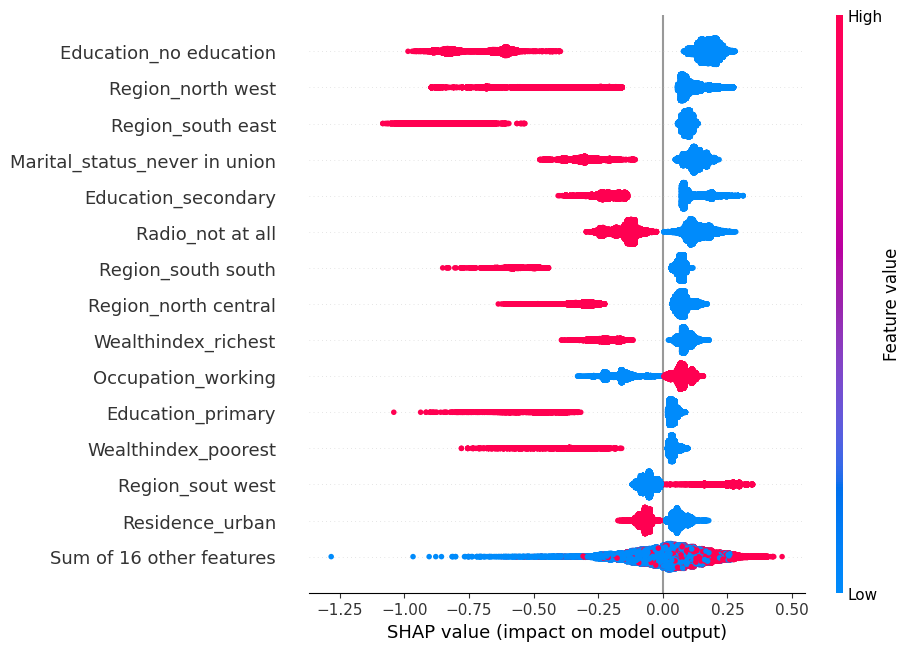

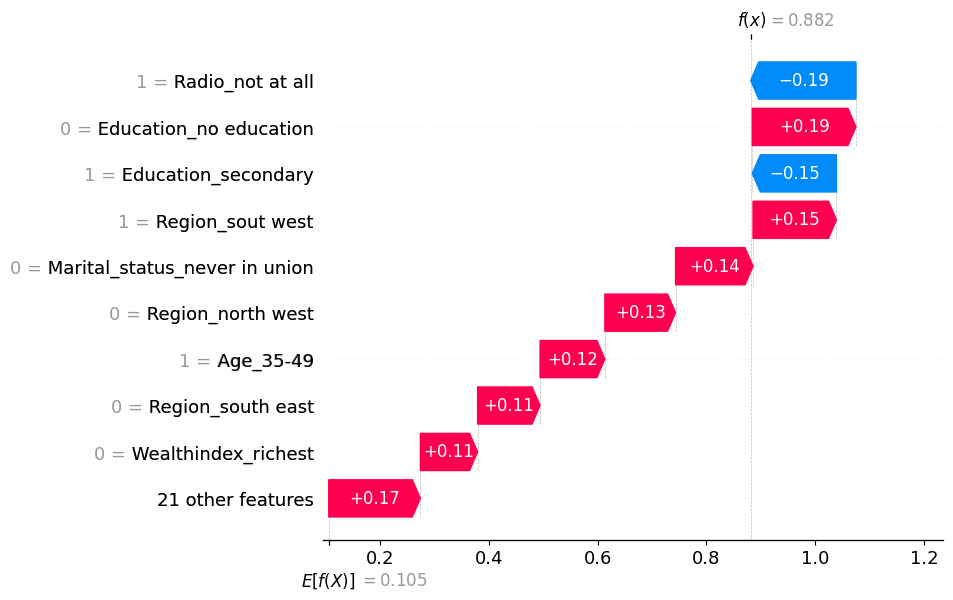

In [ ]:
#Feature contribution in the XGboosting algorithm using Beeswarm and watrefall plots
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
# Fit Gradient Boosting model
xgb_model = GradientBoostingClassifier()
xgb_model.fit(X_train, y_train)
# Create SHAP explainer for tree-based models
explainer = shap.Explainer(xgb_model, X_train)
# Compute SHAP values
shap_values = explainer(X_train)
# Beeswarm plot (global feature impact)
shap.plots.beeswarm(shap_values, max_display=15)
# Waterfall plot (individual prediction explanation)
sample_index = 0
sample_shap = shap_values[sample_index]
shap.plots.waterfall(sample_shap)

In [22]:
#6CatBoost Classifier with Bootstrapped 95% Confidence Interval
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
# Import and initialize
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)
# Make predictions
y_pred_cat = cat_model.predict(X_test)
# Confusion matrix and basic metrics
cm = confusion_matrix(y_test, y_pred_cat)
tn, fp, fn, tp = cm.ravel()
# Core metrics
accuracy = accuracy_score(y_test, y_pred_cat)
sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0  # Recall
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
precision = tp / (tp + fp) if (tp + fp) != 0 else 0  # PPV
npv = tn / (tn + fn) if (tn + fn) != 0 else 0
fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
fnr = fn / (fn + tp) if (fn + tp) != 0 else 0
f1 = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0
# Bootstrap
n_bootstraps = 1000
rng = np.random.RandomState(42)
accs, precs, recalls, f1s = [], [], [], []
sensitivities, specificities, npvs, fprs, fnrs = [], [], [], [], []

for i in range(n_bootstraps):
    indices = rng.choice(len(y_test), len(y_test), replace=True)
    y_true_boot = y_test.iloc[indices]
    y_pred_boot = y_pred_cat[indices]

    cm_boot = confusion_matrix(y_true_boot, y_pred_boot)
    tn_b, fp_b, fn_b, tp_b = cm_boot.ravel()

    accs.append(accuracy_score(y_true_boot, y_pred_boot))
    precs.append(tp_b / (tp_b + fp_b) if (tp_b + fp_b) != 0 else 0)
    recalls.append(tp_b / (tp_b + fn_b) if (tp_b + fn_b) != 0 else 0)
    f1s.append(2 * precs[-1] * recalls[-1] / (precs[-1] + recalls[-1]) if (precs[-1] + recalls[-1]) != 0 else 0)
    sensitivities.append(tp_b / (tp_b + fn_b) if (tp_b + fn_b) != 0 else 0)
    specificities.append(tn_b / (tn_b + fp_b) if (tn_b + fp_b) != 0 else 0)
    npvs.append(tn_b / (tn_b + fn_b) if (tn_b + fn_b) != 0 else 0)
    fprs.append(fp_b / (fp_b + tn_b) if (fp_b + tn_b) != 0 else 0)
    fnrs.append(fn_b / (fn_b + tp_b) if (fn_b + tp_b) != 0 else 0)

# CI function
def ci(metric_list):
    return np.percentile(metric_list, [2.5, 97.5])
# Output
print("🔹 Accuracy:", round(accuracy, 3), "95% CI:", np.round(ci(accs), 3))
print("🔹 Precision (PPV):", round(precision, 3), "95% CI:", np.round(ci(precs), 3))
print("🔹 Sensitivity (Recall):", round(sensitivity, 3), "95% CI:", np.round(ci(recalls), 3))
print("🔹 Specificity:", round(specificity, 3), "95% CI:", np.round(ci(specificities), 3))
print("🔹 Negative Predictive Value (NPV):", round(npv, 3), "95% CI:", np.round(ci(npvs), 3))
print("🔹 False Positive Rate (FPR):", round(fpr, 3), "95% CI:", np.round(ci(fprs), 3))
print("🔹 False Negative Rate (FNR):", round(fnr, 3), "95% CI:", np.round(ci(fnrs), 3))
print("🔹 F1 Score:", round(f1, 3), "95% CI:", np.round(ci(f1s), 3))
print("🔹 Confusion Matrix:\n", cm)
print("🔹 Classification Report:\n", classification_report(y_test, y_pred_cat))
print("🔹 True Positives (TP):", tp)
print("🔹 True Negatives (TN):", tn)
print("🔹 False Positives (FP):", fp)
print("🔹 False Negatives (FN):", fn)

#to  estimate AUC
from sklearn.metrics import roc_auc_score
# Get predicted probabilities for the positive class
y_proba_cat = cat_model.predict_proba(X_test)[:, 1]
# Calculate AUC
auc = roc_auc_score(y_test, y_proba_cat)
print("🔹 AUC:", round(auc, 3))


🔹 Accuracy: 0.704 95% CI: [0.696 0.714]
🔹 Precision (PPV): 0.697 95% CI: [0.684 0.709]
🔹 Sensitivity (Recall): 0.723 95% CI: [0.711 0.736]
🔹 Specificity: 0.686 95% CI: [0.674 0.699]
🔹 Negative Predictive Value (NPV): 0.712 95% CI: [0.701 0.725]
🔹 False Positive Rate (FPR): 0.314 95% CI: [0.301 0.326]
🔹 False Negative Rate (FNR): 0.277 95% CI: [0.264 0.289]
🔹 F1 Score: 0.71 95% CI: [0.699 0.719]
🔹 Confusion Matrix:
 [[3663 1677]
 [1479 3861]]
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.69      0.70      5340
           1       0.70      0.72      0.71      5340

    accuracy                           0.70     10680
   macro avg       0.70      0.70      0.70     10680
weighted avg       0.70      0.70      0.70     10680

🔹 True Positives (TP): 3861
🔹 True Negatives (TN): 3663
🔹 False Positives (FP): 1677
🔹 False Negatives (FN): 1479
🔹 AUC: 0.771


C:\Users\AUT\AppData\Local\Temp\ipykernel_16576\975257706.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Importance (%)', y='Feature', data=feature_importance, palette='viridis')


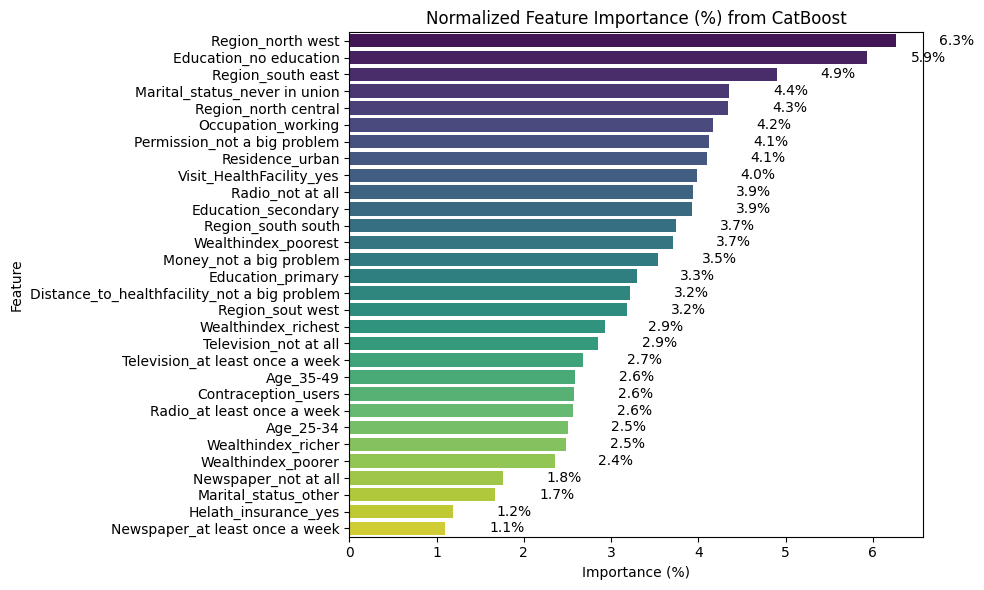

In [ ]:
#Feature Importance for Catboosting
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Extract raw feature importance from CatBoost
importance_raw = cat_model.feature_importances_
# Normalize to percentage
importance_percent = 100 * (importance_raw / importance_raw.sum())
# Create DataFrame
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance (%)': importance_percent
}).sort_values(by='Importance (%)', ascending=False)
# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Importance (%)', y='Feature', data=feature_importance, palette='viridis')
plt.title('Normalized Feature Importance (%) from CatBoost')
# Add percentage labels on top of each bar
for i, value in enumerate(feature_importance['Importance (%)']):
    ax.text(value + 0.5, i, f'{value:.1f}%', va='center')
plt.tight_layout()
plt.show()

In [23]:
#7for support vector machine (SVM)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
# Import and initialize
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
# Make predictions
y_pred_svm = svm_model.predict(X_test)
# Confusion matrix and basic metrics
cm = confusion_matrix(y_test, y_pred_svm)
tn, fp, fn, tp = cm.ravel()
# Core metrics
accuracy = accuracy_score(y_test, y_pred_svm)
sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0  # Recall
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
precision = tp / (tp + fp) if (tp + fp) != 0 else 0  # PPV
npv = tn / (tn + fn) if (tn + fn) != 0 else 0
fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
fnr = fn / (fn + tp) if (fn + tp) != 0 else 0
f1 = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0
# Bootstrap
n_bootstraps = 1000
rng = np.random.RandomState(42)
accs, precs, recalls, f1s = [], [], [], []
sensitivities, specificities, npvs, fprs, fnrs = [], [], [], [], []
for i in range(n_bootstraps):
    indices = rng.choice(len(y_test), len(y_test), replace=True)
    y_true_boot = y_test.iloc[indices]
    y_pred_boot = y_pred_svm[indices]
    cm_boot = confusion_matrix(y_true_boot, y_pred_boot)
    tn_b, fp_b, fn_b, tp_b = cm_boot.ravel()
    accs.append(accuracy_score(y_true_boot, y_pred_boot))
    precs.append(tp_b / (tp_b + fp_b) if (tp_b + fp_b) != 0 else 0)
    recalls.append(tp_b / (tp_b + fn_b) if (tp_b + fn_b) != 0 else 0)
    f1s.append(2 * precs[-1] * recalls[-1] / (precs[-1] + recalls[-1]) if (precs[-1] + recalls[-1]) != 0 else 0)
    sensitivities.append(tp_b / (tp_b + fn_b) if (tp_b + fn_b) != 0 else 0)
    specificities.append(tn_b / (tn_b + fp_b) if (tn_b + fp_b) != 0 else 0)
    npvs.append(tn_b / (tn_b + fn_b) if (tn_b + fn_b) != 0 else 0)
    fprs.append(fp_b / (fp_b + tn_b) if (fp_b + tn_b) != 0 else 0)
    fnrs.append(fn_b / (fn_b + tp_b) if (fn_b + tp_b) != 0 else 0)
# CI function
def ci(metric_list):
    return np.percentile(metric_list, [2.5, 97.5])
# Output
print("🔹 Accuracy:", round(accuracy, 3), "95% CI:", np.round(ci(accs), 3))
print("🔹 Precision (PPV):", round(precision, 3), "95% CI:", np.round(ci(precs), 3))
print("🔹 Sensitivity (Recall):", round(sensitivity, 3), "95% CI:", np.round(ci(recalls), 3))
print("🔹 Specificity:", round(specificity, 3), "95% CI:", np.round(ci(specificities), 3))
print("🔹 Negative Predictive Value (NPV):", round(npv, 3), "95% CI:", np.round(ci(npvs), 3))
print("🔹 False Positive Rate (FPR):", round(fpr, 3), "95% CI:", np.round(ci(fprs), 3))
print("🔹 False Negative Rate (FNR):", round(fnr, 3), "95% CI:", np.round(ci(fnrs), 3))
print("🔹 F1 Score:", round(f1, 3), "95% CI:", np.round(ci(f1s), 3))
print("🔹 Confusion Matrix:\n", cm)
print("🔹 Classification Report:\n", classification_report(y_test, y_pred_svm))
print("🔹 True Positives (TP):", tp)
print("🔹 True Negatives (TN):", tn)
print("🔹 False Positives (FP):", fp)
print("🔹 False Negatives (FN):", fn)
#to  estimate AUC
from sklearn.metrics import roc_auc_score
# Get predicted probabilities for the positive class
y_proba_svm = svm_model.predict_proba(X_test)[:, 1]
# Calculate AUC
auc = roc_auc_score(y_test, y_proba_svm)
print("🔹 AUC:", round(auc, 3))

🔹 Accuracy: 0.69 95% CI: [0.68  0.699]
🔹 Precision (PPV): 0.687 95% CI: [0.675 0.7  ]
🔹 Sensitivity (Recall): 0.697 95% CI: [0.684 0.708]
🔹 Specificity: 0.683 95% CI: [0.671 0.696]
🔹 Negative Predictive Value (NPV): 0.692 95% CI: [0.68  0.705]
🔹 False Positive Rate (FPR): 0.317 95% CI: [0.304 0.329]
🔹 False Negative Rate (FNR): 0.303 95% CI: [0.292 0.316]
🔹 F1 Score: 0.692 95% CI: [0.681 0.702]
🔹 Confusion Matrix:
 [[3647 1693]
 [1620 3720]]
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.68      0.69      5340
           1       0.69      0.70      0.69      5340

    accuracy                           0.69     10680
   macro avg       0.69      0.69      0.69     10680
weighted avg       0.69      0.69      0.69     10680

🔹 True Positives (TP): 3720
🔹 True Negatives (TN): 3647
🔹 False Positives (FP): 1693
🔹 False Negatives (FN): 1620
🔹 AUC: 0.753


In [ ]:
#Feature Importance for SVM (via Permutation Importance)
#SVM does not provide native feature importance, but you can estimate it using permutation importance:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd
# Compute permutation importance
result = permutation_importance(svm_model, X_test, y_test, n_repeats=10, random_state=42)
# Format results
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=True)
# Normalize to percentage
importance_df['Percentage'] = 100 * importance_df['Importance'] / importance_df['Importance'].sum()
# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(importance_df['Feature'], importance_df['Percentage'], color='slateblue')
for bar, pct in zip(bars, importance_df['Percentage']):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{pct:.1f}%', va='center', fontsize=9)
plt.xlabel('Percentage Contribution')
plt.title('Feature Importance for SVM (Permutation-Based)')
plt.tight_layout()
plt.show()


In [24]:
#8for Gausian Naive Bayes(GNB)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
# Import and initialize
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
# Make predictions
y_pred_gnb = gnb_model.predict(X_test)
# Confusion matrix and basic metrics
cm = confusion_matrix(y_test, y_pred_gnb)
tn, fp, fn, tp = cm.ravel()
# Core metrics
accuracy = accuracy_score(y_test, y_pred_gnb)
sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0  # Recall
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
precision = tp / (tp + fp) if (tp + fp) != 0 else 0  # PPV
npv = tn / (tn + fn) if (tn + fn) != 0 else 0
fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
fnr = fn / (fn + tp) if (fn + tp) != 0 else 0
f1 = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0
# Bootstrap
n_bootstraps = 1000
rng = np.random.RandomState(42)
accs, precs, recalls, f1s = [], [], [], []
sensitivities, specificities, npvs, fprs, fnrs = [], [], [], [], []
for i in range(n_bootstraps):
    indices = rng.choice(len(y_test), len(y_test), replace=True)
    y_true_boot = y_test.iloc[indices]
    y_pred_boot = y_pred_gnb[indices]
    cm_boot = confusion_matrix(y_true_boot, y_pred_boot)
    tn_b, fp_b, fn_b, tp_b = cm_boot.ravel()
    accs.append(accuracy_score(y_true_boot, y_pred_boot))
    precs.append(tp_b / (tp_b + fp_b) if (tp_b + fp_b) != 0 else 0)
    recalls.append(tp_b / (tp_b + fn_b) if (tp_b + fn_b) != 0 else 0)
    f1s.append(2 * precs[-1] * recalls[-1] / (precs[-1] + recalls[-1]) if (precs[-1] + recalls[-1]) != 0 else 0)
    sensitivities.append(tp_b / (tp_b + fn_b) if (tp_b + fn_b) != 0 else 0)
    specificities.append(tn_b / (tn_b + fp_b) if (tn_b + fp_b) != 0 else 0)
    npvs.append(tn_b / (tn_b + fn_b) if (tn_b + fn_b) != 0 else 0)
    fprs.append(fp_b / (fp_b + tn_b) if (fp_b + tn_b) != 0 else 0)
    fnrs.append(fn_b / (fn_b + tp_b) if (fn_b + tp_b) != 0 else 0)
# CI function
def ci(metric_list):
    return np.percentile(metric_list, [2.5, 97.5])
# Output
print("🔹 Accuracy:", round(accuracy, 3), "95% CI:", np.round(ci(accs), 3))
print("🔹 Precision (PPV):", round(precision, 3), "95% CI:", np.round(ci(precs), 3))
print("🔹 Sensitivity (Recall):", round(sensitivity, 3), "95% CI:", np.round(ci(recalls), 3))
print("🔹 Specificity:", round(specificity, 3), "95% CI:", np.round(ci(specificities), 3))
print("🔹 Negative Predictive Value (NPV):", round(npv, 3), "95% CI:", np.round(ci(npvs), 3))
print("🔹 False Positive Rate (FPR):", round(fpr, 3), "95% CI:", np.round(ci(fprs), 3))
print("🔹 False Negative Rate (FNR):", round(fnr, 3), "95% CI:", np.round(ci(fnrs), 3))
print("🔹 F1 Score:", round(f1, 3), "95% CI:", np.round(ci(f1s), 3))
print("🔹 Confusion Matrix:\n", cm)
print("🔹 Classification Report:\n", classification_report(y_test, y_pred_gnb))
print("🔹 True Positives (TP):", tp)
print("🔹 True Negatives (TN):", tn)
print("🔹 False Positives (FP):", fp)
print("🔹 False Negatives (FN):", fn)

#to  estimate AUC
from sklearn.metrics import roc_auc_score
# Get predicted probabilities for the positive class
y_proba_gnb = gnb_model.predict_proba(X_test)[:, 1]
# Calculate AUC
auc = roc_auc_score(y_test, y_proba_gnb)
print("🔹 AUC:", round(auc, 3))

🔹 Accuracy: 0.6 95% CI: [0.591 0.61 ]
🔹 Precision (PPV): 0.613 95% CI: [0.599 0.626]
🔹 Sensitivity (Recall): 0.543 95% CI: [0.53  0.556]
🔹 Specificity: 0.657 95% CI: [0.644 0.671]
🔹 Negative Predictive Value (NPV): 0.59 95% CI: [0.578 0.603]
🔹 False Positive Rate (FPR): 0.343 95% CI: [0.329 0.356]
🔹 False Negative Rate (FNR): 0.457 95% CI: [0.444 0.47 ]
🔹 F1 Score: 0.576 95% CI: [0.564 0.588]
🔹 Confusion Matrix:
 [[3509 1831]
 [2441 2899]]
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.66      0.62      5340
           1       0.61      0.54      0.58      5340

    accuracy                           0.60     10680
   macro avg       0.60      0.60      0.60     10680
weighted avg       0.60      0.60      0.60     10680

🔹 True Positives (TP): 2899
🔹 True Negatives (TN): 3509
🔹 False Positives (FP): 1831
🔹 False Negatives (FN): 2441
🔹 AUC: 0.646


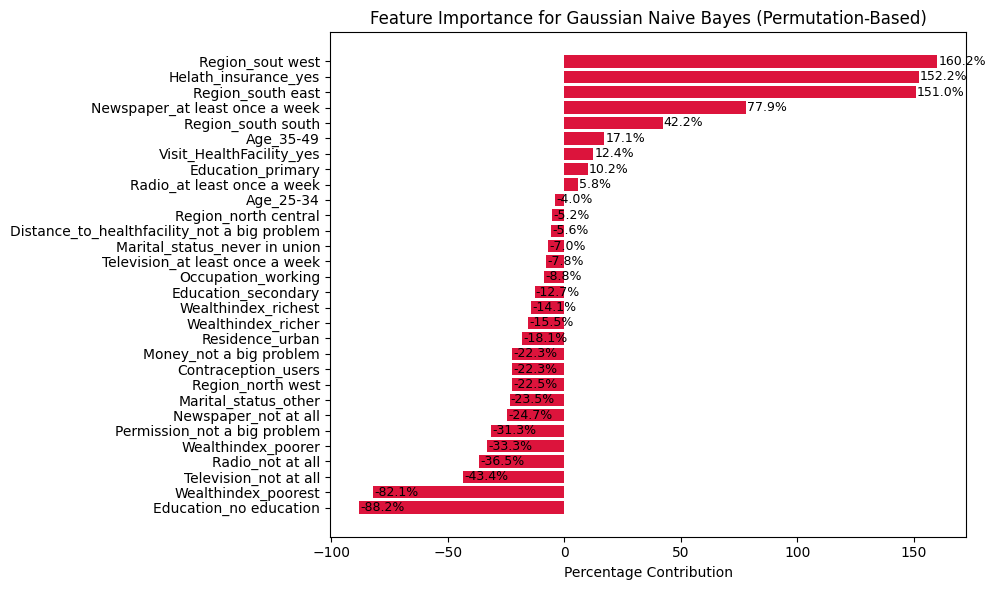

In [ ]:
#Feature Importance via Permutation
#Naive Bayes doesn’t compute feature importance directly, but you can estimate it using permutation importance:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd
# Compute permutation importance
result = permutation_importance(gnb_model, X_test, y_test, n_repeats=10, random_state=42)
# Format results
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=True)
# Normalize to percentage
importance_df['Percentage'] = 100 * importance_df['Importance'] / importance_df['Importance'].sum()
# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(importance_df['Feature'], importance_df['Percentage'], color='crimson')
for bar, pct in zip(bars, importance_df['Percentage']):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{pct:.1f}%', va='center', fontsize=9)
plt.xlabel('Percentage Contribution')
plt.title('Feature Importance for Gaussian Naive Bayes (Permutation-Based)')
plt.tight_layout()
plt.show()

In [25]:
#9Arteficial Neural Network (ANN)
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
# Import and initialize
ann_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300, random_state=42)
ann_model.fit(X_train, y_train)
# Make predictions
y_pred_ann = ann_model.predict(X_test)
# Confusion matrix and basic metrics
cm = confusion_matrix(y_test, y_pred_ann)
tn, fp, fn, tp = cm.ravel()
# Core metrics
accuracy = accuracy_score(y_test, y_pred_ann)
sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0  # Recall
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
precision = tp / (tp + fp) if (tp + fp) != 0 else 0  # PPV
npv = tn / (tn + fn) if (tn + fn) != 0 else 0
fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
fnr = fn / (fn + tp) if (fn + tp) != 0 else 0
f1 = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0
# Bootstrap
n_bootstraps = 1000
rng = np.random.RandomState(42)
accs, precs, recalls, f1s = [], [], [], []
sensitivities, specificities, npvs, fprs, fnrs = [], [], [], [], []
for i in range(n_bootstraps):
    indices = rng.choice(len(y_test), len(y_test), replace=True)
    y_true_boot = y_test.iloc[indices]
    y_pred_boot = y_pred_ann[indices]
    cm_boot = confusion_matrix(y_true_boot, y_pred_boot)
    tn_b, fp_b, fn_b, tp_b = cm_boot.ravel()
    accs.append(accuracy_score(y_true_boot, y_pred_boot))
    precs.append(tp_b / (tp_b + fp_b) if (tp_b + fp_b) != 0 else 0)
    recalls.append(tp_b / (tp_b + fn_b) if (tp_b + fn_b) != 0 else 0)
    f1s.append(2 * precs[-1] * recalls[-1] / (precs[-1] + recalls[-1]) if (precs[-1] + recalls[-1]) != 0 else 0)
    sensitivities.append(tp_b / (tp_b + fn_b) if (tp_b + fn_b) != 0 else 0)
    specificities.append(tn_b / (tn_b + fp_b) if (tn_b + fp_b) != 0 else 0)
    npvs.append(tn_b / (tn_b + fn_b) if (tn_b + fn_b) != 0 else 0)
    fprs.append(fp_b / (fp_b + tn_b) if (fp_b + tn_b) != 0 else 0)
    fnrs.append(fn_b / (fn_b + tp_b) if (fn_b + tp_b) != 0 else 0)
# CI function
def ci(metric_list):
    return np.percentile(metric_list, [2.5, 97.5])
# Output
print("🔹 Accuracy:", round(accuracy, 3), "95% CI:", np.round(ci(accs), 3))
print("🔹 Precision (PPV):", round(precision, 3), "95% CI:", np.round(ci(precs), 3))
print("🔹 Sensitivity (Recall):", round(sensitivity, 3), "95% CI:", np.round(ci(recalls), 3))
print("🔹 Specificity:", round(specificity, 3), "95% CI:", np.round(ci(specificities), 3))
print("🔹 Negative Predictive Value (NPV):", round(npv, 3), "95% CI:", np.round(ci(npvs), 3))
print("🔹 False Positive Rate (FPR):", round(fpr, 3), "95% CI:", np.round(ci(fprs), 3))
print("🔹 False Negative Rate (FNR):", round(fnr, 3), "95% CI:", np.round(ci(fnrs), 3))
print("🔹 F1 Score:", round(f1, 3), "95% CI:", np.round(ci(f1s), 3))
print("🔹 Confusion Matrix:\n", cm)
print("🔹 Classification Report:\n", classification_report(y_test, y_pred_ann))
print("🔹 True Positives (TP):", tp)
print("🔹 True Negatives (TN):", tn)
print("🔹 False Positives (FP):", fp)
print("🔹 False Negatives (FN):", fn)
#to  estimate AUC
from sklearn.metrics import roc_auc_score
# Get predicted probabilities for the positive class
y_proba_ann = ann_model.predict_proba(X_test)[:, 1]
# Calculate AUC
auc = roc_auc_score(y_test, y_proba_ann)
print("🔹 AUC:", round(auc, 3))

🔹 Accuracy: 0.689 95% CI: [0.68  0.698]
🔹 Precision (PPV): 0.687 95% CI: [0.675 0.699]
🔹 Sensitivity (Recall): 0.695 95% CI: [0.683 0.708]
🔹 Specificity: 0.683 95% CI: [0.671 0.695]
🔹 Negative Predictive Value (NPV): 0.692 95% CI: [0.679 0.705]
🔹 False Positive Rate (FPR): 0.317 95% CI: [0.305 0.329]
🔹 False Negative Rate (FNR): 0.305 95% CI: [0.292 0.317]
🔹 F1 Score: 0.691 95% CI: [0.681 0.701]
🔹 Confusion Matrix:
 [[3647 1693]
 [1627 3713]]
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.68      0.69      5340
           1       0.69      0.70      0.69      5340

    accuracy                           0.69     10680
   macro avg       0.69      0.69      0.69     10680
weighted avg       0.69      0.69      0.69     10680

🔹 True Positives (TP): 3713
🔹 True Negatives (TN): 3647
🔹 False Positives (FP): 1693
🔹 False Negatives (FN): 1627
🔹 AUC: 0.753


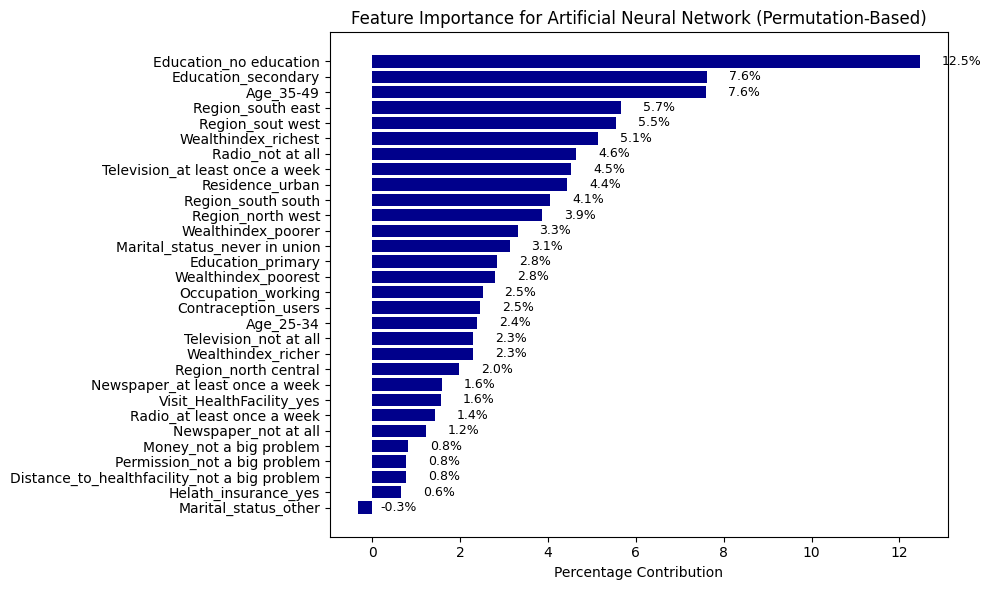

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd
# Compute permutation importance for ANN
result = permutation_importance(ann_model, X_test, y_test, n_repeats=10, random_state=42)
# Format results
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=True)
# Normalize to percentage
importance_df['Percentage'] = 100 * importance_df['Importance'] / importance_df['Importance'].sum()
# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(importance_df['Feature'], importance_df['Percentage'], color='darkblue')
for bar, pct in zip(bars, importance_df['Percentage']):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{pct:.1f}%', va='center', fontsize=9)
plt.xlabel('Percentage Contribution')
plt.title('Feature Importance for Artificial Neural Network (Permutation-Based)')
plt.tight_layout()
plt.show()

In [26]:
#to draw ROC curve all the models
# Logistic Regression
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]
# Decision Tree
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
# Random Forest
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
# KNN
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]
# SVM (use decision_function if predict_proba not available)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]
# Naive Bayes
y_prob_nb = gnb_model.predict_proba(X_test)[:, 1]
# Gradient Boosting
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]
## XGradientBoosting
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
## CatBoosting
y_prob_cat = cat_model.predict_proba(X_test)[:, 1]
# Arteficial neural network
y_prob_ann = ann_model.predict_proba(X_test)[:, 1]

In [27]:
#Compute Roc curves and AUCs
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
fpr_cat, tpr_cat, _ = roc_curve(y_test, y_prob_cat)
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_prob_ann)

auc_lr = roc_auc_score(y_test, y_prob_lr)
auc_dt = roc_auc_score(y_test, y_prob_dt)
auc_rf = roc_auc_score(y_test, y_prob_rf)
auc_knn = roc_auc_score(y_test, y_prob_knn)
auc_svm = roc_auc_score(y_test, y_prob_svm)
auc_nb = roc_auc_score(y_test, y_prob_nb)
auc_gb = roc_auc_score(y_test, y_prob_gb)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)
auc_cat = roc_auc_score(y_test, y_prob_cat)
auc_ann = roc_auc_score(y_test, y_prob_ann)

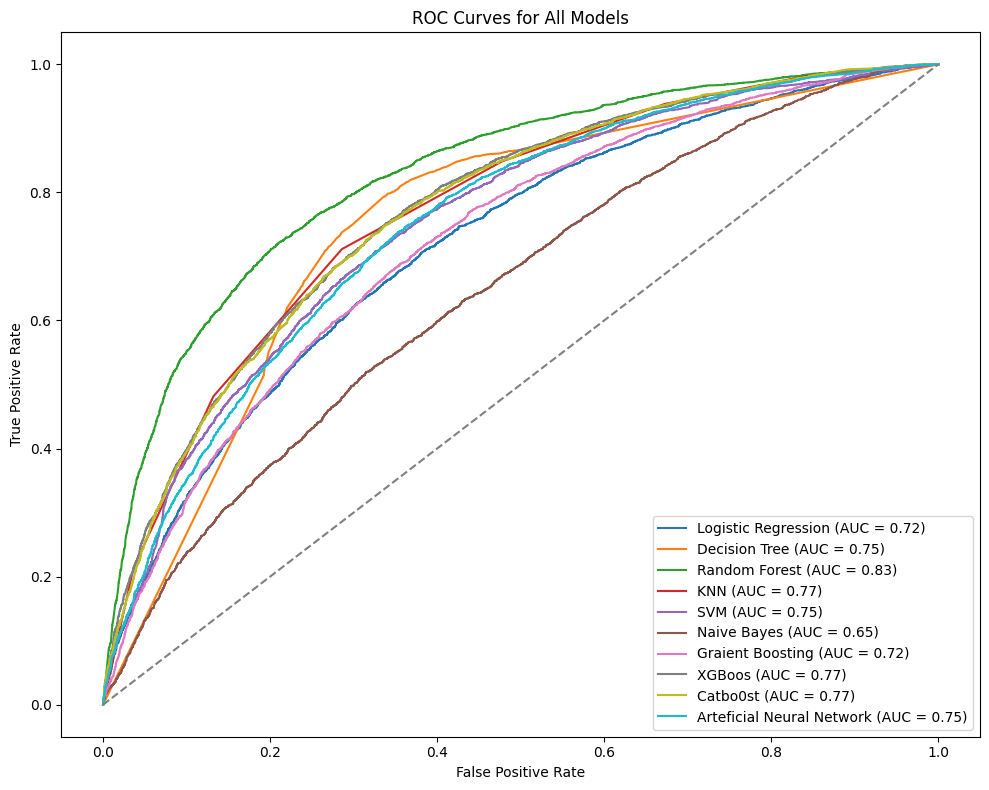

In [28]:
#Plot all ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Graient Boosting (AUC = {auc_gb:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoos (AUC = {auc_xgb:.2f})')
plt.plot(fpr_cat, tpr_cat, label=f'Catbo0st (AUC = {auc_cat:.2f})')
plt.plot(fpr_ann, tpr_ann, label=f'Arteficial Neural Network (AUC = {auc_ann:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [ ]:
import shap
import matplotlib.pyplot as plt
# Initialize SHAP explainer (use TreeExplainer for tree-based models)
explainer = shap.TreeExplainer(xgb-model)  # Replace 'model' with your trained model (e.g., xgb_model, cat_model)
# Compute SHAP values
shap_values = explainer.shap_values(X_test)
# Summary plot (global feature importance)
shap.summary_plot(shap_values, X_test, plot_type="bar", show=True)
# Detailed summary plot (distribution of SHAP values per feature)
shap.summary_plot(shap_values, X_test, show=True)
# Optional: Force plot for individual prediction
# shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])

NameError: name 'xgb' is not defined